In [89]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
#Read files
energy_use_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/ele.csv')
out_env_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/site_weather.csv')
in_cooling_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_sp_c.csv')
in_heating_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_sp_h.csv')
zone_temp_interior=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_interior.csv')
zone_temp_exterior=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_temp_exterior.csv')
co2_conc=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/zone_co2.csv')
occupant=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/occ.csv')
wifi_data=pd.read_csv('D:/MSDA_SJSU/Data 245 ML/Project/Bldg59_clean data/wifi.csv')

In [4]:
energy_use_data.head()

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S,Unnamed: 6
0,2018/1/1 1:00,1.2,0.2,7.5,37.400002,19.500000,NaN
1,2018/1/1 1:15,1.3,0.2,6.8,37.500000,19.889999,NaN
2,2018/1/1 1:30,1.1,0.2,7.4,38.000000,19.299999,NaN
3,2018/1/1 1:45,1.2,0.2,7.7,37.200001,18.889999,NaN
4,2018/1/1 2:00,1.1,0.2,7.3,37.400002,24.700001,NaN


For current project we will keep hvac_N and hvac_S as target variable.Based on this assumption, here we will drop mels_S, lig_S, mels_N and Unnamed:6 variable from erergy_use_data

In [5]:
energy_use_target=energy_use_data[['date','hvac_N','hvac_S']]

In [6]:
energy_use_target.head()

,date,hvac_N,hvac_S
0,2018/1/1 1:00,37.400002,19.500000
1,2018/1/1 1:15,37.500000,19.889999
2,2018/1/1 1:30,38.000000,19.299999
3,2018/1/1 1:45,37.200001,18.889999
4,2018/1/1 2:00,37.400002,24.700001


In [7]:
energy_use_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    103048 non-null  object 
 1   hvac_N  101506 non-null  float64
 2   hvac_S  101506 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.4+ MB


In [8]:
out_env_data.head()

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
0,2018-01-01 00:00:00,11.64,11.51,8.10,79.07,86.70
1,2018-01-01 00:15:00,11.49,11.42,8.14,80.10,45.88
2,2018-01-01 00:30:00,11.59,11.51,8.21,79.92,51.62
3,2018-01-01 00:45:00,11.44,11.41,8.11,80.20,21.43
4,2018-01-01 01:00:00,11.12,11.15,8.04,81.50,6.45


In [9]:
out_env_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105217 entries, 0 to 105216
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          105217 non-null  object 
 1   air_temp_set_1                105217 non-null  float64
 2   air_temp_set_2                105217 non-null  float64
 3   dew_point_temperature_set_1d  105217 non-null  float64
 4   relative_humidity_set_1       105217 non-null  float64
 5   solar_radiation_set_1         105217 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.8+ MB


In [10]:
in_cooling_data.head()

,date,zone_016_cooling_sp,zone_017_cooling_sp,zone_018_cooling_sp,zone_019_cooling_sp,zone_021_cooling_sp,zone_023_cooling_sp,zone_024_cooling_sp,zone_025_cooling_sp,zone_026_cooling_sp,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2018/9/15 10:00,73.0,73.0,75.0,78.0,75.0,73.0,73.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/9/15 10:05,73.0,73.0,75.0,78.0,75.0,73.0,73.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/9/15 10:10,73.0,73.0,75.0,78.0,75.0,73.0,73.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/9/15 10:15,73.0,73.0,75.0,78.0,75.0,73.0,73.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018/9/15 10:20,73.0,73.0,75.0,78.0,75.0,73.0,73.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
in_cooling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237133 entries, 0 to 237132
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 237133 non-null  object 
 1   zone_016_cooling_sp  236632 non-null  float64
 2   zone_017_cooling_sp  236634 non-null  float64
 3   zone_018_cooling_sp  236634 non-null  float64
 4   zone_019_cooling_sp  235917 non-null  float64
 5   zone_021_cooling_sp  236710 non-null  float64
 6   zone_023_cooling_sp  236329 non-null  float64
 7   zone_024_cooling_sp  236263 non-null  float64
 8   zone_025_cooling_sp  236260 non-null  float64
 9   zone_026_cooling_sp  236665 non-null  float64
 10  zone_027_cooling_sp  236162 non-null  float64
 11  zone_030_cooling_sp  236191 non-null  float64
 12  zone_032_cooling_sp  236157 non-null  float64
 13  zone_035_cooling_sp  236700 non-null  float64
 14  zone_036_cooling_sp  236634 non-null  float64
 15  zone_037_cooling_

In [12]:
in_heating_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2018/9/15 10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/9/15 10:05,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/9/15 10:10,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/9/15 10:15,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018/9/15 10:20,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
in_heating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237126 entries, 0 to 237125
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 237126 non-null  object 
 1   zone_016_heating_sp  236626 non-null  float64
 2   zone_017_heating_sp  236626 non-null  float64
 3   zone_018_heating_sp  236626 non-null  float64
 4   zone_019_heating_sp  235911 non-null  float64
 5   zone_021_heating_sp  236704 non-null  float64
 6   zone_023_heating_sp  236325 non-null  float64
 7   zone_024_heating_sp  236256 non-null  float64
 8   zone_025_heating_sp  236253 non-null  float64
 9   zone_026_heating_sp  236658 non-null  float64
 10  zone_027_heating_sp  236155 non-null  float64
 11  zone_030_heating_sp  236183 non-null  float64
 12  zone_032_heating_sp  235793 non-null  float64
 13  zone_035_heating_sp  236693 non-null  float64
 14  zone_036_heating_sp  236629 non-null  float64
 15  zone_037_heating_

In [14]:
zone_temp_interior.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,cerc_templogger_4,cerc_templogger_5,cerc_templogger_6,cerc_templogger_7,cerc_templogger_8,cerc_templogger_9
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,23.500,23.125,23.562,22.312,22.375,22.625
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,23.562,22.875,23.750,22.500,22.500,22.687
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,23.500,23.000,23.625,22.375,22.500,22.687
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,23.500,23.062,24.000,22.437,22.375,22.875
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,23.500,23.125,24.062,22.437,22.687,22.875


In [15]:
zone_temp_exterior.head()

,date,zone_016_temp,zone_017_temp,zone_018_temp,zone_019_temp,zone_021_temp,zone_022_temp,zone_023_temp,zone_024_temp,zone_025_temp,...,zone_063_temp,zone_064_temp,zone_065_temp,zone_066_temp,zone_067_temp,zone_068_temp,zone_069_temp,zone_070_temp,zone_071_temp,zone_072_temp
0,2018-01-01 00:00:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
1,2018-01-01 00:01:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
2,2018-01-01 00:02:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
3,2018-01-01 00:03:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.6,69.8,70.0,71.0
4,2018-01-01 00:04:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.6,69.8,70.0,71.0


In [16]:
co2_conc.head()

,date,zone_022_co2,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2019/8/19 01:33,410.0,416.0,428.0,410.0,397.0,423.0,415.0,405.0,415.0,419.0,408.0
1,2019/8/19 01:34,410.0,418.0,421.0,411.0,406.0,420.0,408.0,405.0,417.0,412.0,412.0
2,2019/8/19 01:35,408.0,429.0,424.0,418.0,409.0,424.0,431.0,414.0,415.0,410.0,416.0
3,2019/8/19 01:36,413.0,414.0,426.0,416.0,407.0,418.0,436.0,414.0,423.0,409.0,417.0
4,2019/8/19 01:37,418.0,404.0,437.0,407.0,412.0,416.0,424.0,409.0,419.0,410.0,408.0


In [17]:
occupant.head()

,date,occ_third_south,occ_fourth_south
0,2018-05-22 07:00:00,0.0,0.0
1,2018-05-22 07:01:00,0.0,1.0
2,2018-05-22 07:02:00,0.0,0.0
3,2018-05-22 07:03:00,0.0,1.0
4,2018-05-22 07:04:00,0.0,0.0


In [18]:
wifi_data.head()

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south
0,2018/5/22 00:00,NaN,NaN,38.0,26.0
1,2018/5/22 00:10,NaN,NaN,37.0,26.0
2,2018/5/22 00:20,NaN,NaN,37.0,28.0
3,2018/5/22 00:30,NaN,NaN,36.0,27.0
4,2018/5/22 00:40,NaN,NaN,36.0,28.0


## File Pre-processing and Merging

#### Changing Date Format for all input files into '%Y-%m-%d %H:%M:%S'

In [19]:
energy_use_target['date'] = pd.to_datetime(energy_use_target['date'],format='%Y/%m/%d %H:%M')
energy_use_target['date'] = pd.to_datetime(energy_use_target['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_12064\108079657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_use_target['date'] = pd.to_datetime(energy_use_target['date'],format='%Y/%m/%d %H:%M')
C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_12064\108079657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_use_target['date'] = pd.to_datetime(energy_use_target['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))


In [20]:
energy_use_target.date

0        2018-01-01 01:00:00
1        2018-01-01 01:15:00
2        2018-01-01 01:30:00
3        2018-01-01 01:45:00
4        2018-01-01 02:00:00
                 ...        
103043   2020-12-31 23:00:00
103044   2020-12-31 23:15:00
103045   2020-12-31 23:30:00
103046   2020-12-31 23:45:00
103047   2021-01-01 00:00:00
Name: date, Length: 103048, dtype: datetime64[ns]

In [21]:
in_cooling_data['date'] = pd.to_datetime(in_cooling_data['date'],format='%Y/%m/%d %H:%M')
in_cooling_data['date'] = pd.to_datetime(in_cooling_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [22]:

in_heating_data['date'] = pd.to_datetime(in_heating_data['date'],format='%Y/%m/%d %H:%M')
in_heating_data['date'] = pd.to_datetime(in_heating_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))


In [23]:
co2_conc['date'] = pd.to_datetime(co2_conc['date'],format='%Y/%m/%d %H:%M')
co2_conc['date'] = pd.to_datetime(co2_conc['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [24]:

wifi_data['date'] = pd.to_datetime(wifi_data['date'],format='%Y/%m/%d %H:%M')
wifi_data['date'] = pd.to_datetime(wifi_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [25]:
##Converting all date columns into date formatted type
out_env_data['date'] = pd.to_datetime(out_env_data['date'],format='%Y-%m-%d %H:%M:%S')
zone_temp_interior['date'] = pd.to_datetime(zone_temp_interior['date'],format='%Y-%m-%d %H:%M:%S')
zone_temp_exterior['date'] = pd.to_datetime(zone_temp_exterior['date'],format='%Y-%m-%d %H:%M:%S')
occupant['date'] = pd.to_datetime(occupant['date'],format='%Y-%m-%d %H:%M:%S')


In [26]:
def change_dateformat(dataframe,col):
    dataframe[col]=pd.to_datetime(dataframe[col],format=='%Y/%m/%d %H:%M')
    dataframe[col]=dataframe[col].dt.strftime('%Y-%m-%d %H:%M:%S')
    return dataframe

#### Processing of in_cooling_data file and in_heating_data file

Both in_cooling_data and in_heating_data files have few unnamed fields with all NAN values. We will removed them for processing

In [27]:
in_cooling_data.drop(columns=['Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45',
                            'Unnamed: 46',
                            'Unnamed: 47', 
                            'Unnamed: 48',
                            'Unnamed: 49',
                            'Unnamed: 50',
                            'Unnamed: 51'],inplace=True)

In [28]:
in_heating_data.drop(columns=['Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45',
                            'Unnamed: 46',
                            'Unnamed: 47', 
                            'Unnamed: 48',
                            'Unnamed: 49',
                            'Unnamed: 50',
                            'Unnamed: 51'],inplace=True)

In [29]:
in_heating_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,zone_061_heating_sp,zone_062_heating_sp,zone_063_heating_sp,zone_064_heating_sp,zone_065_heating_sp,zone_066_heating_sp,zone_067_heating_sp,zone_069_heating_sp,zone_070_heating_sp,zone_071_heating_sp
0,2018-09-15 10:00:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
1,2018-09-15 10:05:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
2,2018-09-15 10:10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
3,2018-09-15 10:15:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
4,2018-09-15 10:20:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0


#### Merging all the files based on date timestamp

In [30]:
#Merged_df=pd.merge(out_env_data,in_cooling_data,in_heating_data,zone_temp_interior,zone_temp_exterior,co2_conc,occupant,how='left')

In [31]:
#Merging indoor cooling and heating data
Merge_cooling_heating=pd.merge(in_cooling_data,in_heating_data,how='left')

In [32]:
#Merging outdoor environment data with indoor merged cooling and heating data
Merge_indoor_outdoor=pd.merge(out_env_data,Merge_cooling_heating,how='left')

In [33]:
#Merging with energy_use_target data
Merge_en=pd.merge(energy_use_target,Merge_indoor_outdoor,how='left')

In [34]:
Merge_en.isnull().sum()

date                       0
hvac_N                  1542
hvac_S                  1542
air_temp_set_1          1525
air_temp_set_2          1525
                       ...  
zone_066_heating_sp    27256
zone_067_heating_sp    27256
zone_069_heating_sp    27137
zone_070_heating_sp    43299
zone_071_heating_sp    27255
Length: 90, dtype: int64

In [35]:
Merge_en.shape

(103048, 90)

In [36]:
#Percentage of null values in each columns
Merge_en.isnull().sum() * 100 / len(Merge_en)

date                    0.000000
hvac_N                  1.496390
hvac_S                  1.496390
air_temp_set_1          1.479893
air_temp_set_2          1.479893
                         ...    
zone_066_heating_sp    26.449810
zone_067_heating_sp    26.449810
zone_069_heating_sp    26.334330
zone_070_heating_sp    42.018283
zone_071_heating_sp    26.448839
Length: 90, dtype: float64

## Missing Value imputation 

### Reference: 
  - https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
       #### Here we will use Iterative Imputer / BayesianRidge model for iterative  imputations for all null values

  - Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import linear_model

#imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')


In [38]:
Merge_en.columns

Index(['date', 'hvac_N', 'hvac_S', 'air_temp_set_1', 'air_temp_set_2',
       'dew_point_temperature_set_1d', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'zone_016_cooling_sp', 'zone_017_cooling_sp',
       'zone_018_cooling_sp', 'zone_019_cooling_sp', 'zone_021_cooling_sp',
       'zone_023_cooling_sp', 'zone_024_cooling_sp', 'zone_025_cooling_sp',
       'zone_026_cooling_sp', 'zone_027_cooling_sp', 'zone_030_cooling_sp',
       'zone_032_cooling_sp', 'zone_035_cooling_sp', 'zone_036_cooling_sp',
       'zone_037_cooling_sp', 'zone_038_cooling_sp', 'zone_039_cooling_sp',
       'zone_041_cooling_sp', 'zone_042_cooling_sp', 'zone_043_cooling_sp',
       'zone_046_cooling_sp', 'zone_047_cooling_sp', 'zone_048_cooling_sp',
       'zone_049_cooling_sp', 'zone_051_cooling_sp', 'zone_053_cooling_sp',
       'zone_054_cooling_sp', 'zone_055_cooling_sp', 'zone_056_cooling_sp',
       'zone_057_cooling_sp', 'zone_059_cooling_sp', 'zone_061_cooling_sp',
       'zone_062_cooling_

In [39]:
#X=Merge_en.loc[:,'zone_016_heating_sp':'zone_071_heating_sp']

In [40]:
X=Merge_en.loc[:,'hvac_N':'zone_071_heating_sp']

In [41]:
X.head()

,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_cooling_sp,zone_017_cooling_sp,zone_018_cooling_sp,...,zone_061_heating_sp,zone_062_heating_sp,zone_063_heating_sp,zone_064_heating_sp,zone_065_heating_sp,zone_066_heating_sp,zone_067_heating_sp,zone_069_heating_sp,zone_070_heating_sp,zone_071_heating_sp
0,37.400002,19.500000,11.12,11.15,8.04,81.5,6.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.500000,19.889999,10.94,11.01,7.99,82.2,1.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.000000,19.299999,10.79,10.84,7.93,82.7,0.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.200001,18.889999,10.71,10.73,8.02,83.6,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.400002,24.700001,10.79,10.84,8.01,83.1,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# define imputer
imputer = IterativeImputer(random_state=42)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [43]:
Xtrans=pd.DataFrame(Xtrans.tolist())

#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
Xtrans.columns=X.columns
Merge_indoor_outdoor.loc[:,'zone_016_heating_sp':'zone_071_heating_sp']=Xtrans

In [44]:
#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
Xtrans.columns=X.columns
Merge_en.loc[:,'hvac_N':'zone_071_heating_sp']=Xtrans

In [45]:
#Percentage of null values in each columns
Merge_en.isnull().sum() * 100 / len(Merge_en)

date                   0.0
hvac_N                 0.0
hvac_S                 0.0
air_temp_set_1         0.0
air_temp_set_2         0.0
                      ... 
zone_066_heating_sp    0.0
zone_067_heating_sp    0.0
zone_069_heating_sp    0.0
zone_070_heating_sp    0.0
zone_071_heating_sp    0.0
Length: 90, dtype: float64

We will merge zone_temp_interior, zone_temp_exterior and co2_conc based on date timestamp

In [46]:
#Merging interior and exterior zone temperature data
Merge_zone_temp=pd.merge(zone_temp_interior, zone_temp_exterior,how='left')

In [47]:
#Merging zone temperature with CO2 concentration
Merge_zonetemp_co2=pd.merge(Merge_zone_temp,co2_conc,how='left')

In [48]:
#Merging zone temperature with CO2 concentration
#Merge_zonetemp_co2=pd.merge(Merge_zone_temp,Merge_zone_temp,how='left')

In [49]:
Merge_zonetemp_co2.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#Percentage of null values in each columns
Merge_zonetemp_co2.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date                   0.000000
cerc_templogger_1      2.512515
cerc_templogger_10     4.866479
cerc_templogger_11     0.243580
cerc_templogger_12     7.833548
                        ...    
zone_052_co2          61.516331
zone_058_co2          61.516331
zone_062_co2          61.516331
zone_068_co2          61.516331
zone_072_co2          61.516331
Length: 79, dtype: float64

### Using Iterative Imputer we will be replacing null values in this merged dataset

In [51]:
feature_Trans1=Merge_zonetemp_co2.loc[:,'cerc_templogger_1':'zone_072_co2']

In [52]:
feature_Trans1.columns

Index(['cerc_templogger_1', 'cerc_templogger_10', 'cerc_templogger_11',
       'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14',
       'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2',
       'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5',
       'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8',
       'cerc_templogger_9', 'zone_016_temp', 'zone_017_temp', 'zone_018_temp',
       'zone_019_temp', 'zone_021_temp', 'zone_022_temp', 'zone_023_temp',
       'zone_024_temp', 'zone_025_temp', 'zone_026_temp', 'zone_027_temp',
       'zone_028_temp', 'zone_030_temp', 'zone_032_temp', 'zone_033_temp',
       'zone_035_temp', 'zone_036_temp', 'zone_037_temp', 'zone_038_temp',
       'zone_039_temp', 'zone_040_temp', 'zone_041_temp', 'zone_042_temp',
       'zone_043_temp', 'zone_044_temp', 'zone_045_temp', 'zone_046_temp',
       'zone_047_temp', 'zone_048_temp', 'zone_049_temp', 'zone_051_temp',
       'zone_052_temp', 'zone_053_temp'

In [53]:
iter_imputer = IterativeImputer(random_state=42)
# fit on the dataset
iter_imputer.fit(feature_Trans1)

D:\MSDA_SJSU\Application dwnload\Anaconda_3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(random_state=42)

In [54]:
Xtrans1=iter_imputer.transform(feature_Trans1)

In [55]:
Xtrans1=pd.DataFrame(Xtrans1.tolist())
Xtrans1

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156412,22.000,21.562,22.187,19.937,19.937,19.125,19.437,19.062,22.125,21.750,...,431.000000,406.000000,412.000000,411.000000,402.000000,412.000000,395.000000,404.000000,398.000000,409.000000
156413,22.062,21.625,22.187,19.937,19.937,19.375,19.500,19.187,22.000,21.625,...,400.000000,411.000000,419.000000,415.000000,405.000000,408.000000,398.000000,404.000000,409.000000,393.000000
156414,22.125,21.687,22.000,19.937,19.875,19.125,19.562,19.062,22.500,21.687,...,409.000000,411.000000,423.000000,414.000000,405.000000,403.000000,392.000000,400.000000,416.000000,403.000000
156415,22.312,21.625,22.437,20.125,20.000,19.375,19.687,19.375,22.687,21.750,...,410.000000,414.000000,406.000000,425.000000,404.000000,407.000000,404.000000,409.000000,418.000000,404.000000


In [56]:
Xtrans1.columns=feature_Trans1.columns

In [57]:
Xtrans1.head()

,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110


In [58]:
#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
#Xtrans1.columns=X.columns
Merge_zonetemp_co2.loc[:,'cerc_templogger_1':'zone_072_co2']=Xtrans1

In [59]:
#Merge_zonetemp_co2=Xtrans1

In [60]:
Merge_zonetemp_co2.isnull().sum()

date                  0
cerc_templogger_1     0
cerc_templogger_10    0
cerc_templogger_11    0
cerc_templogger_12    0
                     ..
zone_052_co2          0
zone_058_co2          0
zone_062_co2          0
zone_068_co2          0
zone_072_co2          0
Length: 79, dtype: int64

In [61]:
#Percentage of null values in each columns
Merge_zonetemp_co2.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date                  0.0
cerc_templogger_1     0.0
cerc_templogger_10    0.0
cerc_templogger_11    0.0
cerc_templogger_12    0.0
                     ... 
zone_052_co2          0.0
zone_058_co2          0.0
zone_062_co2          0.0
zone_068_co2          0.0
zone_072_co2          0.0
Length: 79, dtype: float64

In [62]:
Merge_zonetemp_co2.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110


Merge Merge_indoor_outdoor and Merge_zonetemp_co2 dataframes based on date timestamp

In [63]:
all_df=pd.merge(Merge_en, Merge_zonetemp_co2,how='inner')

In [64]:
all_df.head()

,date,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_cooling_sp,zone_017_cooling_sp,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,47.816667,18.033333,10.43,10.07,-5.98,31.28,245.60,75.148905,75.141335,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,2018-02-22 01:00:00,47.231111,18.122222,9.76,9.51,-4.26,37.27,157.90,75.149101,75.141334,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
2,2018-02-22 01:30:00,46.645556,18.211111,8.99,8.82,-2.81,43.72,67.74,75.149172,75.141365,...,410.183110,417.192094,395.993798,399.566480,425.910259,410.668408,398.382923,395.391205,401.226493,402.923478
3,2018-02-22 02:00:00,46.060000,18.300000,8.20,8.13,-1.80,49.65,8.35,75.149254,75.141424,...,409.859402,416.382527,393.884073,397.575192,427.659487,410.512872,397.405899,394.419118,400.016849,401.537824
4,2018-02-22 02:30:00,45.474444,18.388889,7.64,7.67,-1.11,54.23,0.06,75.149453,75.141528,...,411.948647,418.227176,395.753707,400.022452,430.772951,415.229530,401.512520,397.880444,401.598937,403.786239


In [65]:
all_df.isnull().sum()

date              0
hvac_N            0
hvac_S            0
air_temp_set_1    0
air_temp_set_2    0
                 ..
zone_052_co2      0
zone_058_co2      0
zone_062_co2      0
zone_068_co2      0
zone_072_co2      0
Length: 168, dtype: int64

In [66]:
#Percentage of null values in each columns
all_df.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date              0.0
hvac_N            0.0
hvac_S            0.0
air_temp_set_1    0.0
air_temp_set_2    0.0
                 ... 
zone_052_co2      0.0
zone_058_co2      0.0
zone_062_co2      0.0
zone_068_co2      0.0
zone_072_co2      0.0
Length: 168, dtype: float64

## Principal Component Analysis for dimesionlity reduction

In [67]:
all_df.dtypes

date              datetime64[ns]
hvac_N                   float64
hvac_S                   float64
air_temp_set_1           float64
air_temp_set_2           float64
                       ...      
zone_052_co2             float64
zone_058_co2             float64
zone_062_co2             float64
zone_068_co2             float64
zone_072_co2             float64
Length: 168, dtype: object

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
#to perform PCA we are taking numerical fields only
all_df_num=all_df.loc[:,'air_temp_set_1':]

In [70]:
# Step 1: Standardize the Data
scaler = StandardScaler()
all_df_num_std = scaler.fit_transform(all_df_num)

In [71]:
# Step 2-5: PCA
pca = PCA()
all_df_pca = pca.fit_transform(all_df_num_std)

In [72]:
#Important components from PCA
pd.DataFrame(abs(pca.components_)).shape

(165, 165)

In [73]:
# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)


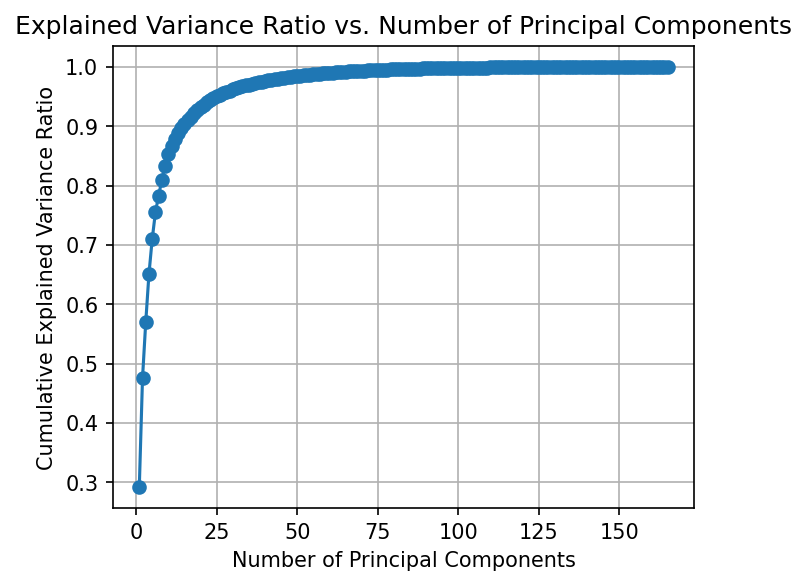

In [74]:
plt.figure(figsize=(5,4),dpi=150)
plt.grid()
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


### Reference:
 - https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
 - https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/
 - https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html

#### PCA is giving us the estimation that the model using around 40 components would have nearly 100% explainability of the data

In [75]:
#all_df.to_csv('cleaned_merged_data.csv', sep=',', index=False, encoding='utf-8')

## Feature Selection 

#### We will be using following types of feature selection processs
  -   Correlation Statistics.  -   
Mutual Information Statistics

####  References
    -   https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
    -   https://machinelearningmastery.com/feature-selection-for-regression-data/.

In [76]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

 As per our assumption hvac_S and hvac_N are the target variables. Here we will separate features and target variables. Also we are dropping non numeric Date parameter for linear regression.

In [77]:
all_df.drop(columns=['date'],inplace=True)

In [78]:
feature=all_df.drop(columns=['hvac_S','hvac_N'])

In [79]:
target=all_df[['hvac_S','hvac_N']]

In [80]:
feature.head()

,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_cooling_sp,zone_017_cooling_sp,zone_018_cooling_sp,zone_019_cooling_sp,zone_021_cooling_sp,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,10.43,10.07,-5.98,31.28,245.60,75.148905,75.141335,75.598624,77.920899,75.643868,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,9.76,9.51,-4.26,37.27,157.90,75.149101,75.141334,75.592485,77.920896,75.636683,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
2,8.99,8.82,-2.81,43.72,67.74,75.149172,75.141365,75.586348,77.920893,75.630353,...,410.183110,417.192094,395.993798,399.566480,425.910259,410.668408,398.382923,395.391205,401.226493,402.923478
3,8.20,8.13,-1.80,49.65,8.35,75.149254,75.141424,75.584595,77.920890,75.625834,...,409.859402,416.382527,393.884073,397.575192,427.659487,410.512872,397.405899,394.419118,400.016849,401.537824
4,7.64,7.67,-1.11,54.23,0.06,75.149453,75.141528,75.586643,77.920889,75.623207,...,411.948647,418.227176,395.753707,400.022452,430.772951,415.229530,401.512520,397.880444,401.598937,403.786239


In [81]:
target.head()

,hvac_S,hvac_N
0,18.033333,47.816667
1,18.122222,47.231111
2,18.211111,46.645556
3,18.300000,46.060000
4,18.388889,45.474444


In [82]:
# spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=1)

We performed feature selection process in the following order:
-  1. Correlation Statistics:
        - a. Target variable : Hvac_S
        - b. Target variable : Hvac_N
-  2. Mutual Information :
        - a. Target variable : Hvac_S
        - b. Target variable : Hvac_N

### 1. Feature selection using correlation statistics

In [83]:
# feature selection
def select_features_corstat(X_train, y_train, X_test):
    #Converting y_train into 1-dimensional
    y_train=np.ravel(y_train)
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

### 1.a We will be selecting Features using correlation statistics for target variable hvac_S

In [84]:
# feature selection process
X_train_fs, X_test_fs, fs = select_features_corstat(X_train, y_train.hvac_S, X_test)

In [85]:
# Checking the scores for the features
feature_list_hvacS_cor={}
for i in range(len(fs.scores_)):
    feature_list_hvacS_cor.update({fs.feature_names_in_[i]: fs.scores_[i]})
    print('Feature %d: %s : %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))


Feature 0: air_temp_set_1 : 14748.640230
Feature 1: air_temp_set_2 : 15085.321706
Feature 2: dew_point_temperature_set_1d : 853.115902
Feature 3: relative_humidity_set_1 : 4080.127846
Feature 4: solar_radiation_set_1 : 1973.508206
Feature 5: zone_016_cooling_sp : 232.581385
Feature 6: zone_017_cooling_sp : 223.797137
Feature 7: zone_018_cooling_sp : 651.298350
Feature 8: zone_019_cooling_sp : 17.587843
Feature 9: zone_021_cooling_sp : 380.570910
Feature 10: zone_023_cooling_sp : 575.937890
Feature 11: zone_024_cooling_sp : 579.559021
Feature 12: zone_025_cooling_sp : 249.030580
Feature 13: zone_026_cooling_sp : 529.048752
Feature 14: zone_027_cooling_sp : 46.836458
Feature 15: zone_030_cooling_sp : 452.910875
Feature 16: zone_032_cooling_sp : 351.094965
Feature 17: zone_035_cooling_sp : 2174.233623
Feature 18: zone_036_cooling_sp : 2179.524757
Feature 19: zone_037_cooling_sp : 149.752471
Feature 20: zone_038_cooling_sp : 701.276976
Feature 21: zone_039_cooling_sp : 186.927693
Feature 2

In [86]:
#creating dataframe from dictionary
selected_feature_1=pd.DataFrame.from_dict(feature_list_hvacS_cor,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withcorr_score_S=selected_feature_1.sort_values(by='value',ascending=False)[:40]

In [87]:
top_40_withcorr_score_S.index

Index(['air_temp_set_2', 'air_temp_set_1', 'cerc_templogger_5',
       'zone_042_temp', 'zone_033_temp', 'zone_038_temp', 'zone_066_temp',
       'cerc_templogger_11', 'zone_057_heating_sp', 'zone_062_heating_sp',
       'cerc_templogger_7', 'cerc_templogger_10', 'zone_049_cooling_sp',
       'zone_057_cooling_sp', 'zone_069_heating_sp', 'zone_057_temp',
       'zone_058_temp', 'zone_059_heating_sp', 'zone_021_temp',
       'zone_070_heating_sp', 'zone_040_temp', 'zone_051_temp',
       'zone_049_heating_sp', 'zone_019_temp', 'zone_055_temp',
       'zone_039_temp', 'zone_054_heating_sp', 'zone_068_temp',
       'zone_044_temp', 'zone_032_temp', 'zone_055_heating_sp',
       'relative_humidity_set_1', 'zone_024_temp', 'zone_052_temp',
       'cerc_templogger_1', 'zone_066_heating_sp', 'cerc_templogger_9',
       'zone_041_temp', 'zone_056_heating_sp', 'zone_063_heating_sp'],
      dtype='object')

In [90]:
feature_select_df_hvacS_1=all_df.loc[:,top_40_withcorr_score_S.index]
#feature_select_df_hvacS_1.to_csv('feature_select_df_hvacS_1.csv', sep=',', index=False, encoding='utf-8')

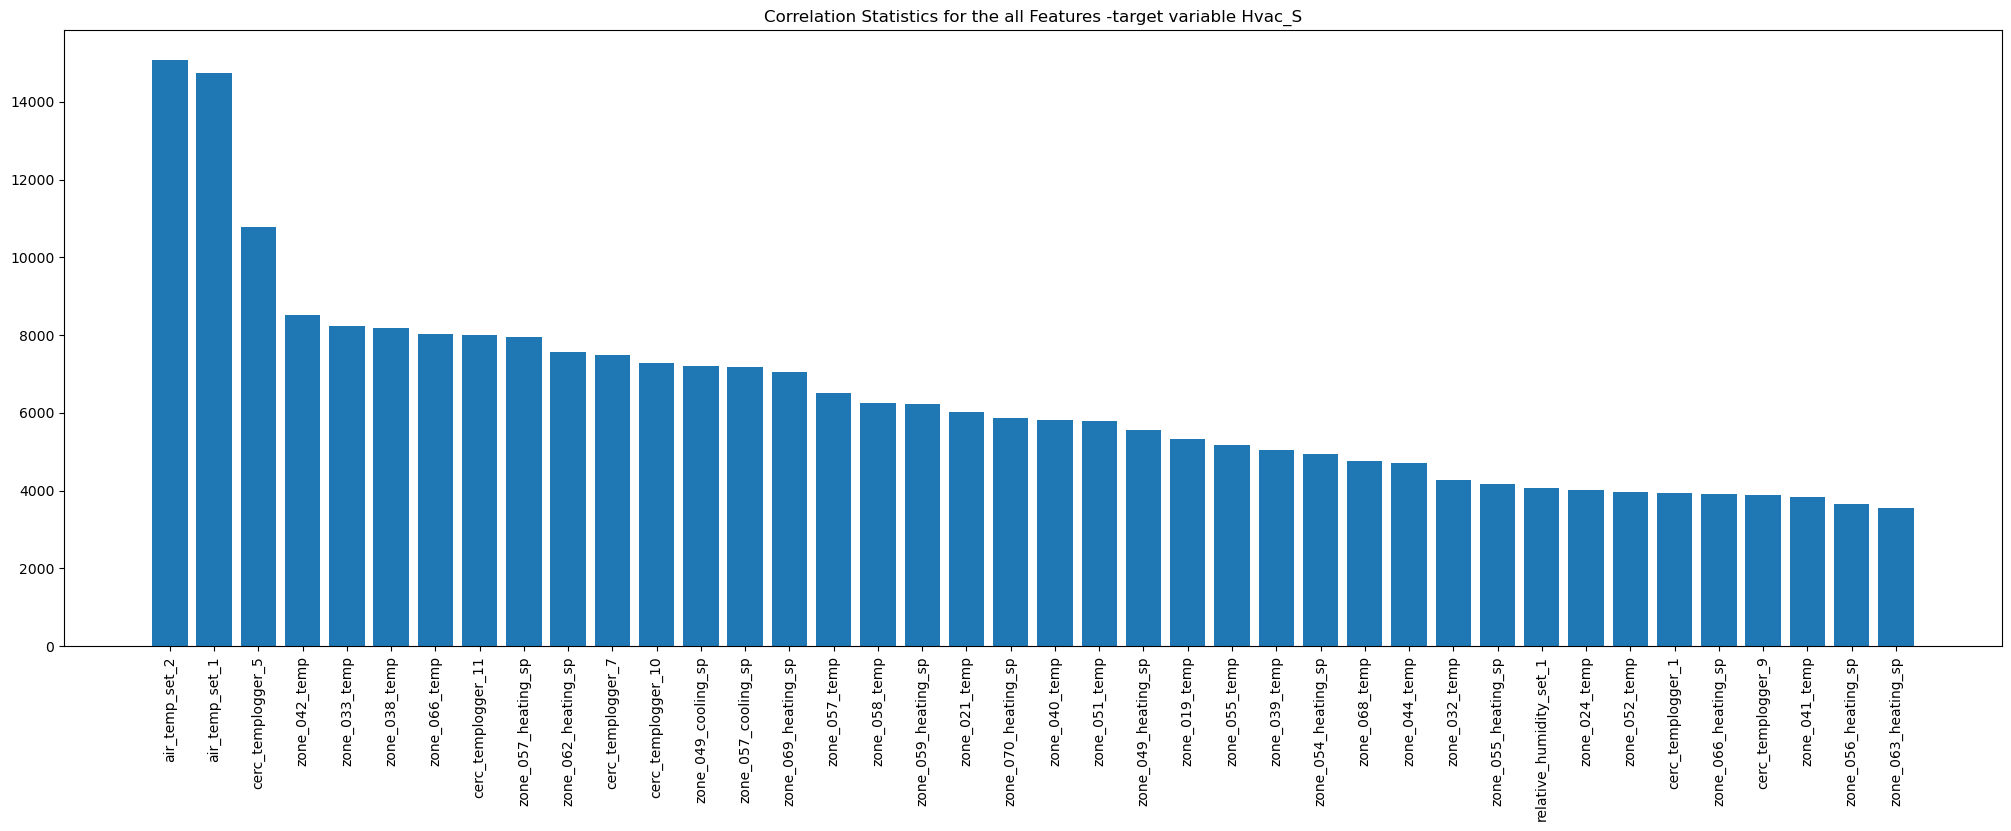

In [296]:
# plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.figure(figsize=(25, 8))
plt.bar(top_40_withcorr_score_S.index,top_40_withcorr_score_S.value)
plt.xticks(top_40_withcorr_score_S.index, rotation='vertical')
plt.title('Correlation Statistics for the all Features -target variable Hvac_S')
plt.show()

#### Building Basic Linear Model for target hvac_S

In [92]:
# Building Linear Regression model
Ln_model = LinearRegression()

In [93]:
# Training the model
Ln_model.fit(X_train_fs, y_train.hvac_S)

LinearRegression()

In [94]:
# Evaluating the model
ypred_lin = Ln_model.predict(X_test_fs)
# evaluating predictions with MAE
mae = mean_absolute_error(y_test.hvac_S, ypred_lin)
print('MAE: %.3f' % mae)


MAE: 5.452


### 1.b We will be selecting Features using correlation statistics for target variable hvac_N

In [95]:
# feature selection process
X_train_fsN, X_test_fsN, fsN = select_features_corstat(X_train, y_train.hvac_N, X_test)

In [96]:
# Checking the scores for the features
feature_list_hvacN_cor={}
for i in range(len(fsN.scores_)):
    feature_list_hvacN_cor.update({fsN.feature_names_in_[i]: fsN.scores_[i]})
    print('Feature %d: %s : %f' % (i,fsN.feature_names_in_[i], fsN.scores_[i]))


Feature 0: air_temp_set_1 : 315.090618
Feature 1: air_temp_set_2 : 413.788179
Feature 2: dew_point_temperature_set_1d : 169.267317
Feature 3: relative_humidity_set_1 : 33.171551
Feature 4: solar_radiation_set_1 : 505.893171
Feature 5: zone_016_cooling_sp : 1397.536421
Feature 6: zone_017_cooling_sp : 1432.958801
Feature 7: zone_018_cooling_sp : 563.466279
Feature 8: zone_019_cooling_sp : 2016.939223
Feature 9: zone_021_cooling_sp : 473.217850
Feature 10: zone_023_cooling_sp : 417.928125
Feature 11: zone_024_cooling_sp : 980.217366
Feature 12: zone_025_cooling_sp : 1257.145786
Feature 13: zone_026_cooling_sp : 679.735102
Feature 14: zone_027_cooling_sp : 2297.878065
Feature 15: zone_030_cooling_sp : 22.063418
Feature 16: zone_032_cooling_sp : 39.531890
Feature 17: zone_035_cooling_sp : 87.425094
Feature 18: zone_036_cooling_sp : 18.348780
Feature 19: zone_037_cooling_sp : 1352.247496
Feature 20: zone_038_cooling_sp : 407.492037
Feature 21: zone_039_cooling_sp : 1515.681340
Feature 22: z

In [97]:
#creating dataframe from dictionary
selected_feature_N1=pd.DataFrame.from_dict(feature_list_hvacN_cor,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withcorr_score_N=selected_feature_N1.sort_values(by='value',ascending=False)[:40]

In [98]:
top_40_withcorr_score_N.index

Index(['zone_057_cooling_sp', 'zone_069_heating_sp', 'zone_057_heating_sp',
       'cerc_templogger_5', 'zone_063_heating_sp', 'zone_061_temp',
       'zone_062_heating_sp', 'zone_059_temp', 'zone_030_temp',
       'zone_062_cooling_sp', 'zone_059_heating_sp', 'zone_066_heating_sp',
       'zone_049_cooling_sp', 'zone_032_temp', 'zone_055_cooling_sp',
       'zone_056_cooling_sp', 'zone_036_heating_sp', 'cerc_templogger_11',
       'zone_049_heating_sp', 'zone_055_heating_sp', 'zone_070_heating_sp',
       'zone_062_temp', 'zone_064_heating_sp', 'zone_064_temp',
       'cerc_templogger_7', 'zone_033_temp', 'zone_056_heating_sp',
       'zone_071_temp', 'zone_059_cooling_sp', 'zone_035_heating_sp',
       'zone_027_cooling_sp', 'zone_037_temp', 'zone_068_temp',
       'cerc_templogger_3', 'zone_019_cooling_sp', 'cerc_templogger_13',
       'zone_037_heating_sp', 'zone_019_heating_sp', 'zone_065_heating_sp',
       'zone_035_temp'],
      dtype='object')

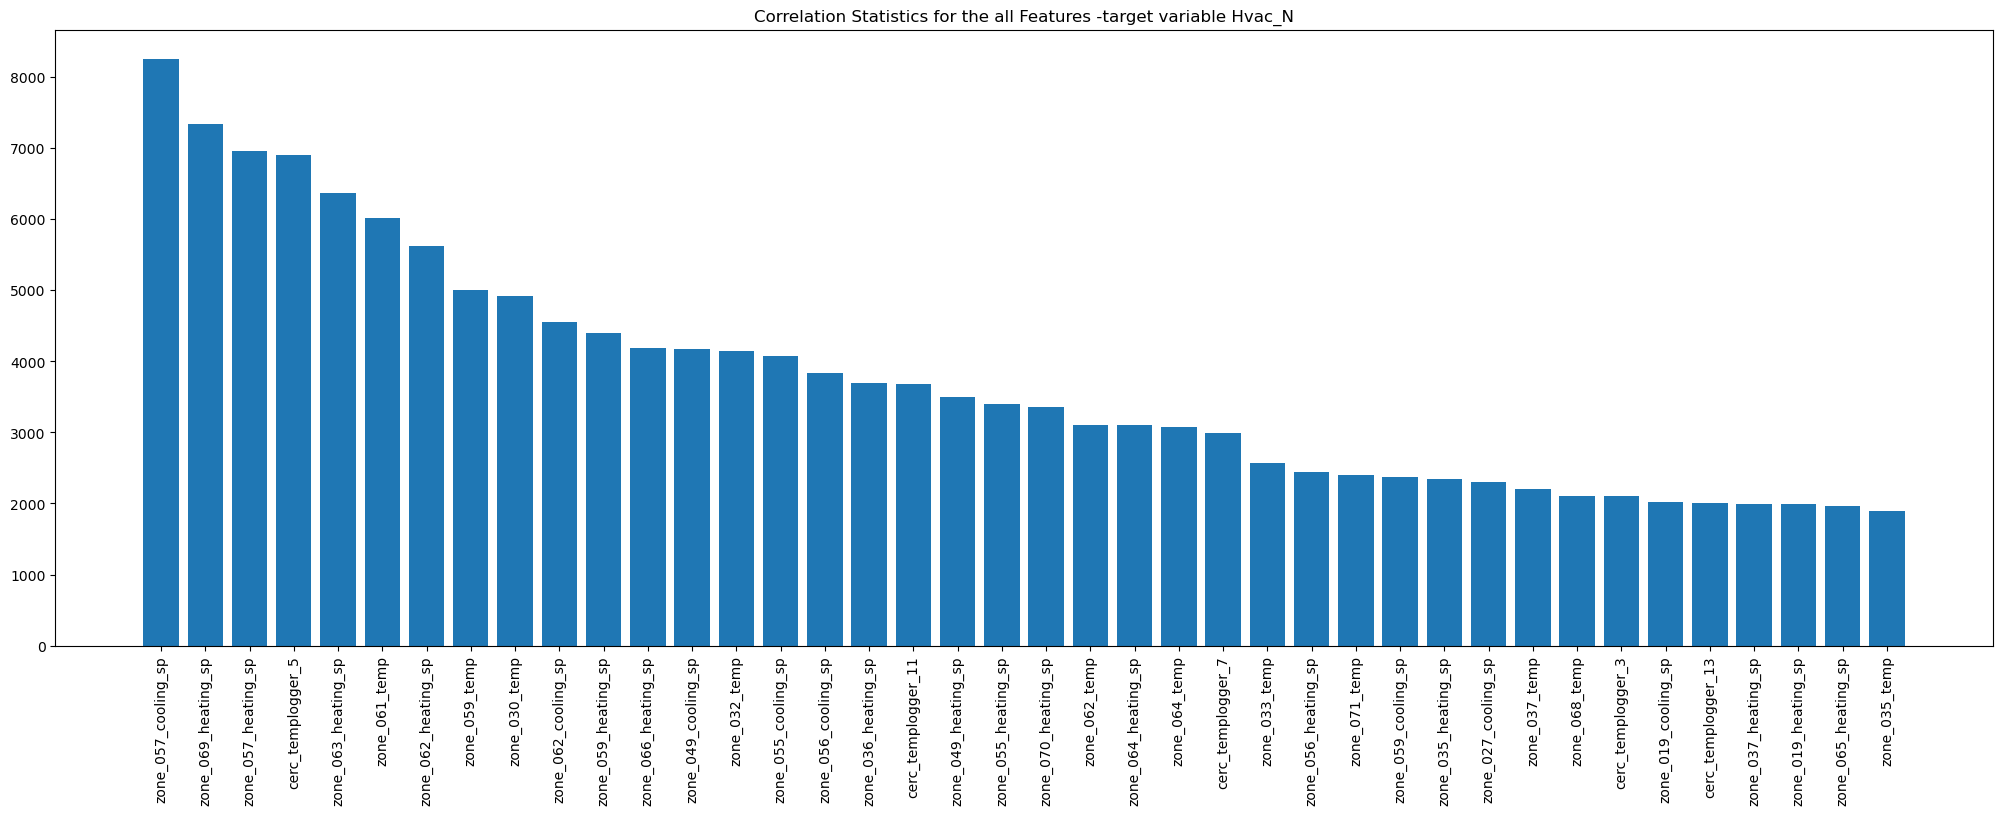

In [295]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(top_40_withcorr_score_N.index,top_40_withcorr_score_N.value)
plt.xticks(top_40_withcorr_score_N.index, rotation='vertical')
plt.title('Correlation Statistics for the all Features -target variable Hvac_N')
plt.show()

### 2.Feature selection and Linear Regression model using Mutual Information statistics


In [100]:
# feature selection
def select_features_mutinfo(X_train, y_train, X_test):
    #Converting y_train into 1-dimensional
    y_train=np.ravel(y_train)
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


### 2.a Mutual Information statistics - Target Variable hvac_S

In [101]:
# feature selection
X_train_fs, X_test_fs, fs = select_features_mutinfo(X_train, y_train.hvac_S, X_test)

In [102]:

# Checking the scores for the features
feature_list_hvacS_mut={}
for i in range(len(fs.scores_)):
    feature_list_hvacS_mut.update({fs.feature_names_in_[i]: fs.scores_[i]})
    print('Feature %d: %s : %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))


Feature 0: air_temp_set_1 : 0.481910
Feature 1: air_temp_set_2 : 0.503714
Feature 2: dew_point_temperature_set_1d : 0.269971
Feature 3: relative_humidity_set_1 : 0.315129
Feature 4: solar_radiation_set_1 : 0.247520
Feature 5: zone_016_cooling_sp : 0.334180
Feature 6: zone_017_cooling_sp : 0.351269
Feature 7: zone_018_cooling_sp : 0.341269
Feature 8: zone_019_cooling_sp : 0.264592
Feature 9: zone_021_cooling_sp : 0.291792
Feature 10: zone_023_cooling_sp : 0.395011
Feature 11: zone_024_cooling_sp : 0.253373
Feature 12: zone_025_cooling_sp : 0.389962
Feature 13: zone_026_cooling_sp : 0.330923
Feature 14: zone_027_cooling_sp : 0.382219
Feature 15: zone_030_cooling_sp : 0.377638
Feature 16: zone_032_cooling_sp : 0.591501
Feature 17: zone_035_cooling_sp : 0.232246
Feature 18: zone_036_cooling_sp : 0.265157
Feature 19: zone_037_cooling_sp : 0.391410
Feature 20: zone_038_cooling_sp : 0.297601
Feature 21: zone_039_cooling_sp : 0.414770
Feature 22: zone_041_cooling_sp : 0.385493
Feature 23: zone

In [103]:
#creating dataframe from dictionary
selected_feature_2=pd.DataFrame.from_dict(feature_list_hvacS_mut,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withmut_score=selected_feature_2.sort_values(by='value',ascending=False)[:40]

feature_select_df_hvacS_2=all_df.loc[:,top_40_withmut_score.index]
#feature_select_df_hvacS_2.to_csv('feature_select_df_hvacS_2.csv', sep=',', index=False, encoding='utf-8')

In [104]:
top_40_withmut_score.index

Index(['zone_032_cooling_sp', 'air_temp_set_2', 'air_temp_set_1',
       'zone_066_heating_sp', 'zone_070_heating_sp', 'zone_055_heating_sp',
       'zone_061_heating_sp', 'zone_066_cooling_sp', 'zone_032_heating_sp',
       'zone_053_cooling_sp', 'zone_046_cooling_sp', 'zone_070_cooling_sp',
       'zone_023_heating_sp', 'zone_069_heating_sp', 'zone_065_heating_sp',
       'zone_064_cooling_sp', 'zone_059_heating_sp', 'zone_061_cooling_sp',
       'zone_063_heating_sp', 'zone_054_heating_sp', 'zone_057_heating_sp',
       'zone_054_cooling_sp', 'zone_055_cooling_sp', 'zone_064_heating_sp',
       'zone_039_cooling_sp', 'zone_062_heating_sp', 'zone_038_heating_sp',
       'zone_053_heating_sp', 'zone_037_heating_sp', 'zone_057_cooling_sp',
       'zone_043_cooling_sp', 'zone_049_heating_sp', 'zone_063_cooling_sp',
       'zone_035_heating_sp', 'zone_023_cooling_sp', 'zone_059_cooling_sp',
       'zone_043_heating_sp', 'zone_037_cooling_sp', 'zone_039_heating_sp',
       'zone_025_cooli

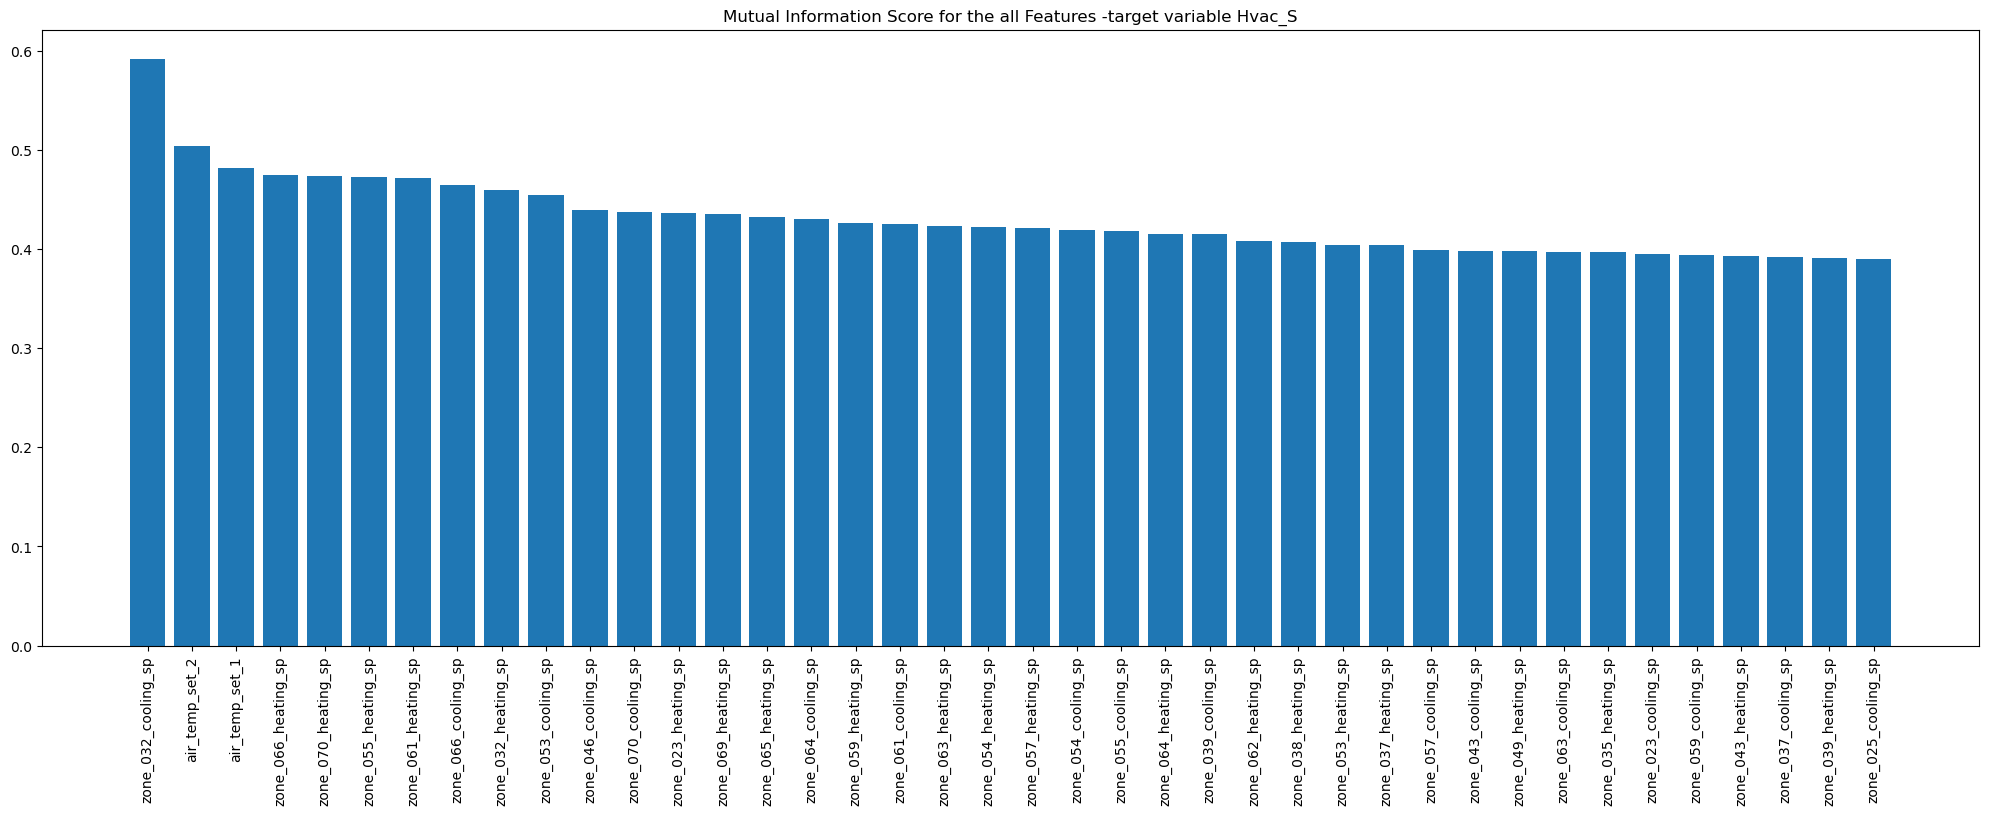

In [297]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(top_40_withmut_score.index,top_40_withmut_score.value)
plt.xticks(top_40_withmut_score.index, rotation='vertical')
plt.title('Mutual Information Score for the all Features -target variable Hvac_S')
plt.show()

#### Building Basic Linear Model

In [106]:
# fiting the model
Ln_model_2 = LinearRegression()
Ln_model_2.fit(X_train_fs, y_train)
# evaluate the model
y_pred_2 = Ln_model_2.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_pred_2, y_pred_2)
print('MAE: %.6f' % mae)

MAE: 0.000000


### 2.b  Mutual Information statistics - Target Variable hvac_N

In [107]:
# feature selection
X_train_fsN, X_test_fsN, fsN = select_features_mutinfo(X_train, y_train.hvac_N, X_test)

In [108]:
# Checking the scores for the features
feature_list_hvacN_mut={}
for i in range(len(fsN.scores_)):
    feature_list_hvacN_mut.update({fsN.feature_names_in_[i]: fsN.scores_[i]})
    print('Feature %d: %s : %f' % (i,fsN.feature_names_in_[i], fsN.scores_[i]))


Feature 0: air_temp_set_1 : 0.342211
Feature 1: air_temp_set_2 : 0.350944
Feature 2: dew_point_temperature_set_1d : 0.256322
Feature 3: relative_humidity_set_1 : 0.287166
Feature 4: solar_radiation_set_1 : 0.252034
Feature 5: zone_016_cooling_sp : 0.653998
Feature 6: zone_017_cooling_sp : 0.709831
Feature 7: zone_018_cooling_sp : 0.484966
Feature 8: zone_019_cooling_sp : 0.401987
Feature 9: zone_021_cooling_sp : 0.868697
Feature 10: zone_023_cooling_sp : 0.768772
Feature 11: zone_024_cooling_sp : 0.425157
Feature 12: zone_025_cooling_sp : 0.835135
Feature 13: zone_026_cooling_sp : 0.614219
Feature 14: zone_027_cooling_sp : 0.866592
Feature 15: zone_030_cooling_sp : 0.788009
Feature 16: zone_032_cooling_sp : 1.001818
Feature 17: zone_035_cooling_sp : 0.384373
Feature 18: zone_036_cooling_sp : 0.519289
Feature 19: zone_037_cooling_sp : 0.839804
Feature 20: zone_038_cooling_sp : 0.467401
Feature 21: zone_039_cooling_sp : 0.775587
Feature 22: zone_041_cooling_sp : 0.639751
Feature 23: zone

In [109]:
#creating dataframe from dictionary
selected_feature_N2=pd.DataFrame.from_dict(feature_list_hvacN_mut,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withmut_score_N=selected_feature_N2.sort_values(by='value',ascending=False)[:40]

In [110]:
top_40_withmut_score_N.index

Index(['zone_032_cooling_sp', 'zone_071_heating_sp', 'zone_051_cooling_sp',
       'zone_070_heating_sp', 'zone_035_heating_sp', 'zone_055_heating_sp',
       'zone_070_cooling_sp', 'zone_057_heating_sp', 'zone_053_heating_sp',
       'zone_037_heating_sp', 'zone_065_heating_sp', 'zone_056_heating_sp',
       'zone_061_cooling_sp', 'zone_059_heating_sp', 'zone_021_heating_sp',
       'zone_023_heating_sp', 'zone_056_cooling_sp', 'zone_039_heating_sp',
       'zone_051_heating_sp', 'zone_066_heating_sp', 'zone_036_heating_sp',
       'zone_021_cooling_sp', 'zone_027_cooling_sp', 'zone_053_cooling_sp',
       'zone_066_cooling_sp', 'zone_061_heating_sp', 'zone_025_heating_sp',
       'zone_037_cooling_sp', 'zone_025_cooling_sp', 'zone_064_heating_sp',
       'zone_057_cooling_sp', 'zone_043_cooling_sp', 'zone_030_heating_sp',
       'zone_049_heating_sp', 'zone_062_heating_sp', 'zone_043_heating_sp',
       'zone_054_cooling_sp', 'zone_054_heating_sp', 'zone_067_cooling_sp',
       'zone

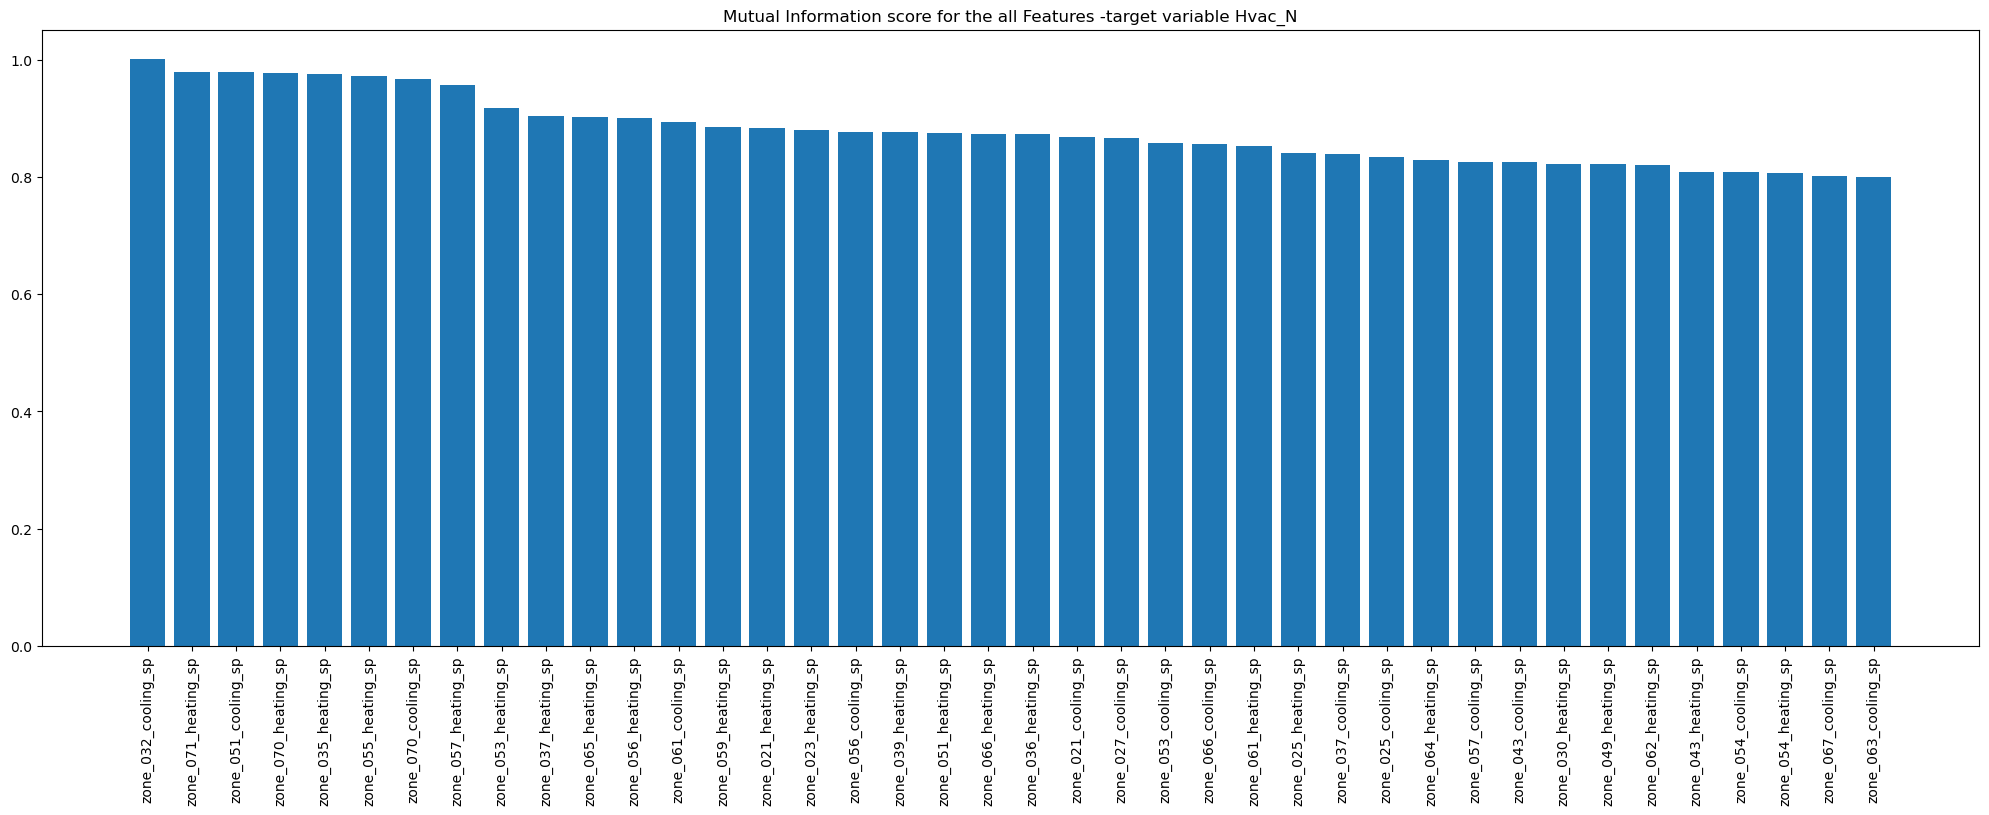

In [298]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(top_40_withmut_score_N.index,top_40_withmut_score_N.value)
plt.xticks(top_40_withmut_score_N.index, rotation='vertical')
plt.title('Mutual Information score for the all Features -target variable Hvac_N')
plt.show()

# Building Models

## Multiple Linear Regression

### With Feature selected with correlation statistics 
-  We will be building models with selected features from correlation statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

### With Feature selected with correlation statistics for target variable Hvac_S

In [353]:
#Selected features through Cooreleation Statistics for target Hvac_S : top_40_withcorr_score_S.index
feature_corr=feature.loc[:,top_40_withcorr_score_S.index]

In [354]:

#data.to_csv('data_X_all_corr.csv', index=False) 
#target.to_csv('target_all_corr.csv',index=False)

In [355]:
##We will keep 10% data for demo purpose.
X1, X_test_demo, y1, y_test_demo = train_test_split(feature_corr,target, random_state=42, test_size=0.1)


In [367]:
## Saving the data for Demo
X_test_demo.to_csv('X_test_corrS_demo.csv', index=False)  
y_test_demo.to_csv('y_test_corrS_demo.csv', index=False)  

In [368]:
## Saving the data for demo modelling
X1.to_csv('X_train_corrS_demo.csv', index=False) 
y1.to_csv('y_train_corrS_demo.csv', index=False) 

In [358]:
#Splitting the data in 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X1,y1, random_state=42, test_size=0.3)

### Function to evaluate model evaluation metrics for linear regression

In [359]:
## Function to evaluate the regression models
def evaluate_regression_model(y_test,y_pred):
    print('R2 score: {}'.format(r2_score(y_test,y_pred)))
    print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, y_pred)))
    print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, y_pred)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE): {}'.format(rmse))
    print('Mean Absolute Percentage Error (MAPE): {}'.format(mean_absolute_percentage_error(y_test, y_pred)))
    

### Multiple Linear Regression with Feature Standardization 

In [360]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', RobustScaler()),
  #  ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.5627261885038681
Test score: 0.5586883313334714


In [361]:
#Predicting the target variables
pred_cor_y=pipeline.predict(X_test)

#### Model Evaluation

In [362]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y)

R2 score: 0.5586883313334714
Mean Absolute Error (MAE): 6.540254996775684
Mean Squared Error (MSE): 78.66600104305084
Root Mean Squared Error (RMSE): 8.869385606852981
Mean Absolute Percentage Error (MAPE): 4496384876333519.0


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [363]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=3, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.7868793650562942
Test score: 0.773986670947008


In [364]:
#Predicting the target variables
pred_cor_y_ridge=ridge_pipeline.predict(X_test)

#### Model Evaluation

In [365]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_ridge)

R2 score: 0.773986670947008
Mean Absolute Error (MAE): 4.4037480917082625
Mean Squared Error (MSE): 39.892032084619444
Root Mean Squared Error (RMSE): 6.316013939552338
Mean Absolute Percentage Error (MAPE): 2598941275649747.5


### We will be saving this model for Demo:

In [366]:
Pkl_Filename = "Pickle_MLRwithRidge_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(ridge_pipeline, file)

### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [123]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=.5, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

Training score: 0.581848725283964
Test score: 0.576040357460478


In [124]:
#Predicting the target variables
pred_cor_y_lasso=lasso_pipe.predict(X_test)

#### Model Evaluation

In [125]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_lasso)

R2 score: 0.576040357460478
Mean Absolute Error (MAE): 6.256362856602495
Mean Squared Error (MSE): 74.89660383662407
Root Mean Squared Error (RMSE): 8.654282398710135
Mean Absolute Percentage Error (MAPE): 5507639687378086.0


### Feature selected with Correlation Statistics for target variable hvac_N

In [314]:
#Selected features through Cooreleation Statistics for target Hvac_N : top_40_withcorr_score_N.index
feature_corr_N=feature.loc[:,top_40_withcorr_score_N.index]

In [315]:
##We will keep 10% data for demo purpose.
X2, X_test_demo2, y2, y_test_demo2 = train_test_split(feature_corr_N,target, random_state=42, test_size=0.1)

In [316]:
## Saving the data for Demo
X_test_demo2.to_csv('X_test_corrN_demo.csv', index=False)  
y_test_demo2.to_csv('y_test_corrN_demo.csv', index=False)  
## Saving the data for Demo
X2.to_csv('X_train_corrN_demo.csv', index=False)  
y2.to_csv('y_train_corrN_demo.csv', index=False)  

In [128]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X2,y2, random_state=42, test_size=0.3)

### Multiple Linear Regression with Feature Standardization 

In [129]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.8767288953893999
Test score: -1670366715512159.2


In [130]:
#Predicting the target variables
pred_cor_y=pipeline.predict(X_test)

#### Model Evaluation

In [131]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y)

R2 score: -1670366715512159.2
Mean Absolute Error (MAE): 11083243.196928866
Mean Squared Error (MSE): 2.8584496059718733e+17
Root Mean Squared Error (RMSE): 534644705.01183057
Mean Absolute Percentage Error (MAPE): 7.292249156085209e+20


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [132]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=3, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.7665602174306878
Test score: 0.729840591527394


In [133]:
#Predicting the target variables
pred_cor_y_ridge=ridge_pipeline.predict(X_test)

#### Model Evaluation

In [134]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_ridge)

R2 score: 0.729840591527394
Mean Absolute Error (MAE): 4.7234692049939575
Mean Squared Error (MSE): 47.60565580226904
Root Mean Squared Error (RMSE): 6.8996851958816965
Mean Absolute Percentage Error (MAPE): 2702190024943235.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [135]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=.5, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

Training score: 0.5682590191691637
Test score: 0.5650762630219444


In [136]:
#Predicting the target variables
pred_cor_y_lasso=lasso_pipe.predict(X_test)

#### Model Evaluation 

In [137]:
#Model Evaluation
evaluate_regression_model(y_test,pred_cor_y_lasso)

R2 score: 0.5650762630219444
Mean Absolute Error (MAE): 6.3382526396540495
Mean Squared Error (MSE): 76.68238537142031
Root Mean Squared Error (RMSE): 8.756847913000449
Mean Absolute Percentage Error (MAPE): 5040569538481658.0


### With Feature selected with Mutual Information statistics 
-  We will be building models with selected features from mutual information statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

### Selected features through Mutual Information Statistics for target Hvac_S 

In [138]:
#Selected features through Mutual Information Statistics for target Hvac_S : top_40_withmut_score.index

feature_mut=feature.loc[:,top_40_withmut_score.index]

In [139]:
##We will keep 10% data for demo purpose.
X3, X_test_demo3, y3, y_test_demo3 = train_test_split(feature_mut,target, random_state=42, test_size=0.1)

In [140]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X3,y3, random_state=42, test_size=0.3)

### Multiple Linear Regression with Feature Standardization 

In [141]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', StandardScaler()),
 #   ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.41699209547148197
Test score: -1.9794623521214203


In [142]:
#Predicting the target variables
pred_mut_y=pipeline.predict(X_test)

### Model Evaluation

In [143]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y)

R2 score: -1.9794623521214203
Mean Absolute Error (MAE): 7.732300438152743
Mean Squared Error (MSE): 552.6371118756764
Root Mean Squared Error (RMSE): 23.508234980016606
Mean Absolute Percentage Error (MAPE): 5495358499501677.0


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [144]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=100, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.7098123611603643
Test score: -2459888.5074168243


In [145]:
#Predicting the target variables
pred_mut_y_ridge=ridge_pipeline.predict(X_test)

### Model Evaluation

In [146]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_ridge)

R2 score: -2459888.5074168243
Mean Absolute Error (MAE): 144.37038438688813
Mean Squared Error (MSE): 414054930.77143574
Root Mean Squared Error (RMSE): 20348.339754668825
Mean Absolute Percentage Error (MAPE): 4178923967022160.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [147]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=.1, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

D:\MSDA_SJSU\Application dwnload\Anaconda_3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.952e+04, tolerance: 6.283e+02
  model = cd_fast.enet_coordinate_descent(


Training score: 0.6030273886811406
Test score: -2163.3104150414547


In [148]:
#Predicting the target variables
pred_mut_y_lasso=lasso_pipe.predict(X_test)

### Model Evaluation

In [149]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_lasso)

R2 score: -2163.3104150414547
Mean Absolute Error (MAE): 11.104903918468338
Mean Squared Error (MSE): 376056.45080908254
Root Mean Squared Error (RMSE): 613.2344175020532
Mean Absolute Percentage Error (MAPE): 4979520534206241.0


### Selected features through Mutual  Information Statistics for target Hvac_N : top_40_withmut_score_N

In [150]:
#Selected features through Mutual Information Statistics for target Hvac_N : top_40_withmut_score_N.index

feature_mut_N=feature.loc[:,top_40_withmut_score_N.index]

In [151]:
##We will keep 10% data for demo purpose.
X4, X_test_demo4, y4, y_test_demo4 = train_test_split(feature_mut_N,target, random_state=42, test_size=0.1)

In [152]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X4,y4, random_state=42, test_size=0.3)

### Multiple Linear Regression with Feature Standardization 

In [153]:
#Creating Polynomial feature and then performing linear regression with Robust Scalar transformaton
steps = [
    ('scalar', StandardScaler()),
  #  ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test,y_test)))

Training score: 0.3811482292290813
Test score: -12.058093950578279


In [154]:
#Predicting the target variables
pred_mut_y=pipeline.predict(X_test)

### Model Evaluation

In [155]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y)

R2 score: -12.058093950578279
Mean Absolute Error (MAE): 8.089582202947181
Mean Squared Error (MSE): 2246.0658042401183
Root Mean Squared Error (RMSE): 47.39267669419104
Mean Absolute Percentage Error (MAPE): 5769236930067480.0


### Multiple Linear Regression with Feature Standardization and Ridge Regularization

In [156]:
#Creating Polynomial feature and then performing linear regression with Standard Scalar and Ridge Regularization
steps = [
    ('scalar', RobustScaler()),
 #   ('poly', PolynomialFeatures(degree=2,include_bias=False)),
    ('model', Ridge(alpha=0.06, fit_intercept=True))
]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training score: {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test score: {}'.format(ridge_pipeline.score(X_test,y_test)))

Training score: 0.38107251542885207
Test score: -11.877377213520857


In [157]:
#Predicting the target variables
pred_mut_y_ridge=ridge_pipeline.predict(X_test)

### Model Evaluation

In [158]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_ridge)

R2 score: -11.877377213520857
Mean Absolute Error (MAE): 8.086939496286234
Mean Squared Error (MSE): 2216.4580133290974
Root Mean Squared Error (RMSE): 47.079273712846266
Mean Absolute Percentage Error (MAPE): 5773651278694969.0


### Multiple Linear Regression with Feature Standardization and Lasso Regularization

In [159]:
steps = [
    ('scalar', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=100, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test,y_test)))

Training score: 2.9976021664879227e-15
Test score: -0.00012239884458731254


In [160]:
#Predicting the target variables
pred_mut_y_lasso=lasso_pipe.predict(X_test)

### Model Evaluation

In [161]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mut_y_lasso)

R2 score: -0.00012239884458731254
Mean Absolute Error (MAE): 10.582836904558455
Mean Squared Error (MSE): 177.49923706245374
Root Mean Squared Error (RMSE): 13.322883961907563
Mean Absolute Percentage Error (MAPE): 7764055009408616.0


### ------------------- End of Multiple Linear Regression Model --------- #

## XGBoost for Regression 

### With Feature selected with correlation statistics 
-  We will be building models with selected features from correlation statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

#### Reference
- https://medium.com/@okanyenigun/cross-validation-techniques-for-machine-learning-a-guide-to-improve-model-performance-8748d46281cc
- https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

#### Selected features through Cooreleation Statistics for target Hvac_S : top_40_withcorr_score_S

In [369]:
#Selected features through Cooreleation Statistics for target Hvac_S : top_40_withcorr_score_S.index
feature_corr_S=feature.loc[:,top_40_withcorr_score_S.index]

##We will keep 10% data for demo purpose.
X5, X_test_demo5, y5, y_test_demo5 = train_test_split(feature_corr_S,target, random_state=42, test_size=0.1)
                                                      
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X5,y5.hvac_S, random_state=42, test_size=0.3)

In [370]:
## Saving the data for Demo
X_test_demo5.to_csv('X_test_XGBcorrS_demo.csv', index=False)  
y_test_demo5.to_csv('y_test_XGBcorrS_demo.csv', index=False)  

In [371]:
## Saving the data for demo modelling
X5.to_csv('X_train_XGBcorrS_demo.csv', index=False) 
y5.to_csv('y_train_XGBcorrS_demo.csv', index=False)

In [372]:
# Building the model
xgb_corrS = XGBRegressor(objective='reg:squarederror')

In [373]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=5)
grid_search_corrS = GridSearchCV(xgb_corrS, param_grid, cv=kf)
grid_search_corrS.fit(X_train, y_train)
print('Best Parameters : ', grid_search_corrS.best_params_)
print('Best Score : ', grid_search_corrS.best_score_)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 7}
Best Score :  0.8897494404396161


In [374]:
#Predicting the target variables
pred_corrS=grid_search_corrS.predict(X_test)

### Model Evaluation

In [375]:
#Model Evaluation
evaluate_regression_model(y_test,pred_corrS)

R2 score: 0.8923531075356226
Mean Absolute Error (MAE): 2.9387807708894385
Mean Squared Error (MSE): 18.071246140710723
Root Mean Squared Error (RMSE): 4.251028833201525
Mean Absolute Percentage Error (MAPE): 2186292397925481.5


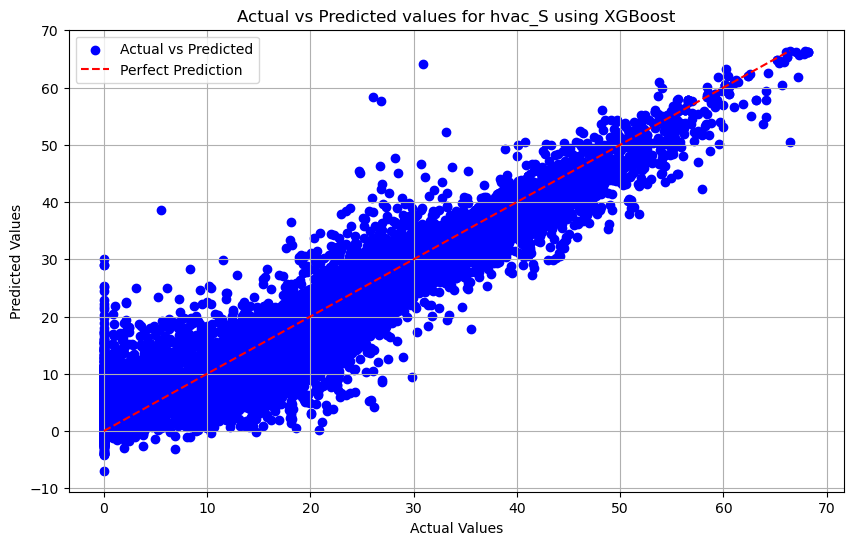

In [376]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_corrS, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(pred_corrS)], [min(y_test), max(pred_corrS)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted values for hvac_S using XGBoost')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### We will be saving the model for demo - HvacS prediction

In [377]:

Pkl_Filename_HvacS = "Pickle_XGBwithCorrS_Model.pkl"  

with open(Pkl_Filename_HvacS, 'wb') as file:  
    pickle.dump(grid_search_corrS, file)

#### Selected features through Coorelation Statistics for target Hvac_N : top_40_withcorr_score_N

In [389]:
#Selected features through Cooreleation Statistics for target Hvac_N : top_40_withcorr_score_N.index
feature_corr_N=feature.loc[:,top_40_withcorr_score_N.index]

##We will keep 10% data for demo purpose.
X6, X_test_demo6, y6, y_test_demo6 = train_test_split(feature_corr_N,target, random_state=42, test_size=0.1)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X6,y6.hvac_N, random_state=42, test_size=0.3)

In [390]:
## Saving the data for Demo
X_test_demo6.to_csv('X_test_XGBcorrN_demo.csv', index=False)  
y_test_demo6.to_csv('y_test_XGBcorrN_demo.csv', index=False)  


In [391]:
## Saving the data for Demo
X6.to_csv('X_train_XGBcorrN_demo.csv', index=False)  
y6.to_csv('y_train_XGBcorrN_demo.csv', index=False)  

In [392]:
# Building the model
xgb_corrN = XGBRegressor(objective='reg:squarederror')

In [393]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=8)
grid_search_corrN = GridSearchCV(xgb_corrN, param_grid, cv=kf)
grid_search_corrN.fit(X_train, y_train)
print('Best Parameters : ', grid_search_corrN.best_params_)
print('Best Score : ', grid_search_corrN.best_score_)

Best Parameters :  {'learning_rate': 0.3, 'max_depth': 7}
Best Score :  0.9396079672397023


In [394]:
#Predicting the target variables
pred_corrN=grid_search_corrN.predict(X_test)

### Model Evaluation

In [395]:
#Model Evaluation
evaluate_regression_model(y_test,pred_corrN)

R2 score: 0.9431022297267233
Mean Absolute Error (MAE): 1.8973391380819615
Mean Squared Error (MSE): 10.644348945181516
Root Mean Squared Error (RMSE): 3.2625678452993916
Mean Absolute Percentage Error (MAPE): 532253542903811.9


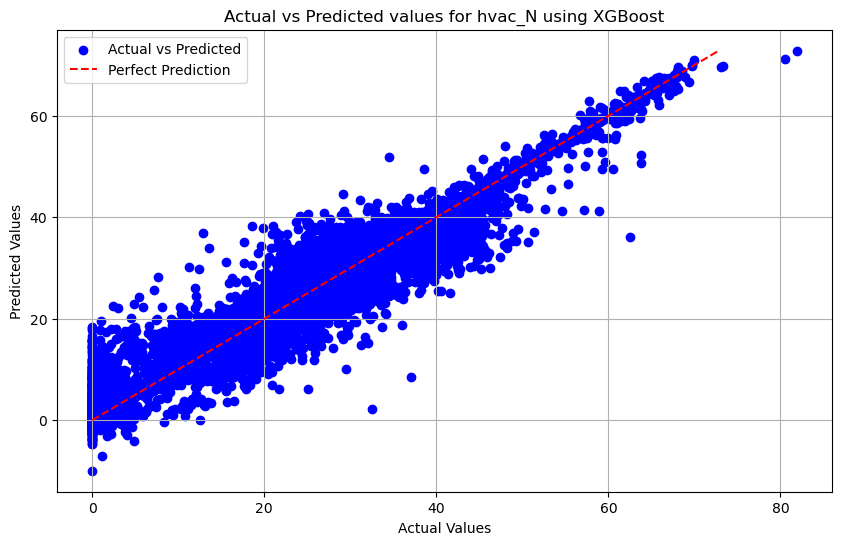

In [396]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_corrN, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(pred_corrN)], [min(y_test), max(pred_corrN)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted values for hvac_N using XGBoost')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### We will be saving this model for Demo:

In [397]:

Pkl_Filename_2 = "Pickle_XGBwithCorrN_Model.pkl"  

with open(Pkl_Filename_2, 'wb') as file:  
    pickle.dump(grid_search_corrN, file)

### With Feature selected with Mutual Information statistics 
-  We will be building models with selected features from Mutual Information statistics and taget variables- hvac_S and hvac_N
-  And we will select selective feature from feature dataset

#### Selected features through Mutual Information Statistics for target Hvac_S : top_40_withmut_score

In [387]:
#Selected features through Mutual Information Statistics for target Hvac_S : top_40_withmut_score.index

feature_mut_S=feature.loc[:,top_40_withmut_score.index]

##We will keep 10% data for demo purpose.
X7, X_test_demo7, y7, y_test_demo7 = train_test_split(feature_mut_S,target, random_state=42, test_size=0.1)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X7,y7.hvac_S, random_state=42, test_size=0.3)

In [388]:
## Saving the data for Demo
X_test_demo7.to_csv('X_test_XGBmutS_demo.csv', index=False)  
y_test_demo7.to_csv('y_test_XGBmutS_demo.csv', index=False)  

In [277]:
## Saving the data for demo modelling
X7.to_csv('X_train_XGBmutS_demo.csv', index=False) 
y7.to_csv('y_train_XGBmutS_demo.csv', index=False)

In [278]:
# Building the model
xgb_mutS = XGBRegressor(objective='reg:squarederror')

In [279]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [9,10,12], 'learning_rate': [0.01,0.05,0.1, 0.2]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=8)
grid_search_mutS = GridSearchCV(xgb_mutS, param_grid, cv=kf)
grid_search_mutS.fit(X_train, y_train)
print('Best Parameters : ', grid_search_mutS.best_params_)
print('Best Score : ', grid_search_mutS.best_score_)

Best Parameters :  {'learning_rate': 0.1, 'max_depth': 10}
Best Score :  0.8020478081922248


In [280]:
#Predicting the target variables
pred_mutS=grid_search_mutS.predict(X_test)

### Model Evaluation

In [281]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mutS)

R2 score: 0.801654081233053
Mean Absolute Error (MAE): 3.7462658396619624
Mean Squared Error (MSE): 33.297365460215694
Root Mean Squared Error (RMSE): 5.7703869419836735
Mean Absolute Percentage Error (MAPE): 3133373976372010.5


In [282]:
### We will be saving this model for Demo:

Pkl_Filename_3 = "Pickle_XGBwithMutS_Model.pkl"  

with open(Pkl_Filename_3, 'wb') as file:  
    pickle.dump(grid_search_mutS, file)

#### Selected features through Mutual Information Statistics for target Hvac_N : top_40_withmut_score_N

In [252]:
#Selected features through Mutual Information Statistics for target Hvac_N : top_40_withmut_score_N.index

feature_mut_N=feature.loc[:,top_40_withmut_score_N.index]

##We will keep 10% data for demo purpose.
X8, X_test_demo8, y8, y_test_demo8 = train_test_split(feature_mut_N,target, random_state=42, test_size=0.1)


#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X8,y8.hvac_N, random_state=42, test_size=0.3)

In [254]:
# Building the model
xgb_mutN = XGBRegressor(objective='reg:squarederror')

In [236]:
# Setting up hyperparameter grid
param_grid = {'max_depth': [6, 7, 9 , 10, 12], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# k-fold cross validation using GridSearch
kf = KFold(n_splits=8)
grid_search_mutN = GridSearchCV(xgb_mutN, param_grid, cv=kf)
grid_search_mutN.fit(X_train, y_train)
print('Best Parameters : ', grid_search_mutN.best_params_)
print('Best Score : ', grid_search_mutN.best_score_)

Best Parameters :  {'learning_rate': 0.1, 'max_depth': 7}
Best Score :  0.8212509099004706


In [237]:
#Predicting the target variables
pred_mutN=grid_search_mutN.predict(X_test)

### Model Evaluation

In [238]:
#Model Evaluation
evaluate_regression_model(y_test,pred_mutN)

R2 score: 0.8204294066918683
Mean Absolute Error (MAE): 3.2288326176187816
Mean Squared Error (MSE): 33.59379543846148
Root Mean Squared Error (RMSE): 5.796015479487738
Mean Absolute Percentage Error (MAPE): 1712047587603719.5


### ---------------------- End of XGBoost Model ----------------------- #

# k-NN Algorithm - Correlation Statistics for target variable hvac_S

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

### Validation split of data by keeping aside 10 percent of data and working on 90 percent of data for model building

In [13]:
# Load the CSV file
#df = pd.read_csv("feature_select_df_hvacS_1.csv")

# Perform 90:10 train-test split
#train_90, test_10 = train_test_split(df, test_size=0.1, random_state=42)

# Save the 90% split files
#train_90.to_csv("train_90.csv", index=False)
#test_10.to_csv("test_10.csv", index=False)

In [14]:
#target = all_df[['hvac_S', 'hvac_N']]

#target.to_csv("target.csv", index=False)

# Perform 90:10 train-test split for the target variable
#target_train_90, target_test_10 = train_test_split(target, test_size=0.1, random_state=42)

# Save the 90% split target variable
#target_train_90.to_csv("target_train_90.csv", index=False)
#target_test_10.to_csv("target_test_10.csv", index=False)

target_90 = pd.read_csv("target_train_90.csv")

# Align indices of features with the 90% split target variable
#df_target_90 = df.loc[target_90.index]


In [15]:
df_features_90 = pd.read_csv("train_90_S.csv")

In [16]:

X1_train, X1_test, y1_train, y1_test = train_test_split(df_features_90, target_90['hvac_S'], random_state=42, test_size=0.3)

In [17]:

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X1_train_scaled, y1_train)

y1_pred = knn.predict(X1_test_scaled)

mse_hvacS = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse_hvacS)


Mean Squared Error: 28.82916824489818


In [23]:
print('k-NN R2 score for hvacS: {}'.format(r2_score(y1_test,y1_pred)))
print('k-NN Mean Absolute Error (MAE) for hvacS: {}'.format(mean_absolute_error(y1_test, y1_pred)))
print('k-NN Mean Squared Error (MSE) for hvacS: {}'.format(mean_squared_error(y1_test, y1_pred)))
rmse_hvacS = np.sqrt(mean_squared_error(y1_test, y1_pred))
print('k-NN Root Mean Squared Error (RMSE) for hvacS: {}'.format(rmse_hvacS))

k-NN R2 score for hvacS: 0.8282825654851133
k-NN Mean Absolute Error (MAE) for hvacS: 3.3433649369199396
k-NN Mean Squared Error (MSE) for hvacS: 28.82916824489818
k-NN Root Mean Squared Error (RMSE) for hvacS: 5.369280049028751


# Hyperparameter tuning in k-NN through cross-validation and gridsearch

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

knn_cv = KNeighborsRegressor(n_neighbors=3)

cv_scores = cross_val_score(knn_cv, X1_train_scaled, y1_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(knn_cv, X1_train_scaled, y1_train, cv=5, scoring='r2')

print("CV Scores (RMSE):", np.sqrt(-cv_scores))
print("Mean CV Score (RMSE):", np.mean(np.sqrt(-cv_scores)))

print("CV Scores (R squared):", cv_scores_r2)
print("Mean CV Score (R squared):", np.mean(cv_scores_r2))

param_grid = {'n_neighbors': np.arange(1, 25, 2)}

# Using GridSearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

knn_gscv.fit(X1_train_scaled, y1_train)

print("Best n_neighbors value:", knn_gscv.best_params_)

print("Best CV Score (RMSE):", np.sqrt(-knn_gscv.best_score_))

y_pred_tuned = knn_gscv.predict(X1_test_scaled)
rmse = np.sqrt(mean_squared_error(y1_test, y_pred_tuned))
r_squared = r2_score(y1_test, y_pred_tuned)
print("Test Set RMSE:", rmse)
print("Test Set R squared:", r_squared)


CV Scores (RMSE): [5.52224117 5.65746091 5.45893267 5.50326052 5.50503789]
Mean CV Score (RMSE): 5.529386630786256
CV Scores (R squared): [0.81794709 0.81011869 0.82995449 0.81953875 0.82222567]
Mean CV Score (R squared): 0.8199569380909955
Best n_neighbors value: {'n_neighbors': 5}
Best CV Score (RMSE): 5.524417821602885
Test Set RMSE: 5.369280049028751
Test Set R squared: 0.8282825654851133


#### From Hyperparameter tuning results, we can see that k-NN model performs best at k=5


#### Implementing k-NN with other distance metrics such as manhattan and minkowski

In [24]:
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

knn_manhattan.fit(X1_train_scaled, y1_train)

y1_pred_manhattan = knn_manhattan.predict(X1_test_scaled)

# Evaluate the model with Manhattan distance
mse_hvacS_manhattan = mean_squared_error(y1_test, y1_pred_manhattan)
print("\nManhattan Distance:")
print("Mean Squared Error:", mse_hvacS_manhattan)
print('k-NN R2 score for hvacS: {}'.format(r2_score(y1_test, y1_pred_manhattan)))
print('k-NN Mean Absolute Error (MAE) for hvacS: {}'.format(mean_absolute_error(y1_test, y1_pred_manhattan)))
print('k-NN Mean Squared Error (MSE) for hvacS: {}'.format(mse_hvacS_manhattan))
rmse_hvacS_manhattan = np.sqrt(mse_hvacS_manhattan)
print('k-NN Root Mean Squared Error (RMSE) for hvacS: {}'.format(rmse_hvacS_manhattan))



Manhattan Distance:
Mean Squared Error: 27.630878360373906
k-NN R2 score for hvacS: 0.8354200334490759
k-NN Mean Absolute Error (MAE) for hvacS: 3.2773541570332063
k-NN Mean Squared Error (MSE) for hvacS: 27.630878360373906
k-NN Root Mean Squared Error (RMSE) for hvacS: 5.25650819084056


In [25]:
knn_minkowski = KNeighborsRegressor(n_neighbors=5, metric='minkowski')

knn_minkowski.fit(X1_train_scaled, y1_train)

y1_pred_minkowski = knn_minkowski.predict(X1_test_scaled)

# Evaluate the model with Minkowski distance
mse_hvacS_minkowski = mean_squared_error(y1_test, y1_pred_minkowski)
print("\nMinkowski Distance (p=2, equivalent to Euclidean):")
print("Mean Squared Error:", mse_hvacS_minkowski)
print('k-NN R2 score for hvacS: {}'.format(r2_score(y1_test, y1_pred_minkowski)))
print('k-NN Mean Absolute Error (MAE) for hvacS: {}'.format(mean_absolute_error(y1_test, y1_pred_minkowski)))
print('k-NN Mean Squared Error (MSE) for hvacS: {}'.format(mse_hvacS_minkowski))
rmse_hvacS_minkowski = np.sqrt(mse_hvacS_minkowski)
print('k-NN Root Mean Squared Error (RMSE) for hvacS: {}'.format(rmse_hvacS_minkowski))



Minkowski Distance (p=2, equivalent to Euclidean):
Mean Squared Error: 28.82916824489818
k-NN R2 score for hvacS: 0.8282825654851133
k-NN Mean Absolute Error (MAE) for hvacS: 3.3433649369199396
k-NN Mean Squared Error (MSE) for hvacS: 28.82916824489818
k-NN Root Mean Squared Error (RMSE) for hvacS: 5.369280049028751


In [45]:
import numpy as np

# Scale the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Calculate the inverse covariance matrix
VI = np.linalg.inv(np.cov(X1_train_scaled, rowvar=False))

# Chebyshev distance
knn_chebyshev = KNeighborsRegressor(n_neighbors=5, metric='chebyshev')

# Mahalanobis distance
knn_mahalanobis = KNeighborsRegressor(n_neighbors=5, metric='mahalanobis', metric_params={'VI': VI})

# Train and evaluate models with different distance metrics

models = {
    "Chebyshev": knn_chebyshev,
    "Mahalanobis": knn_mahalanobis
}

for name, model in models.items():
    print(name)
    model.fit(X1_train_scaled, y1_train)
    y1_pred_dis = model.predict(X1_test_scaled)
    
    mse_hvacS = mean_squared_error(y1_test, y1_pred_dis)
    print("Mean Squared Error:", mse_hvacS)
    print('k-NN R2 score for hvacS:', r2_score(y1_test, y1_pred_dis))
    print('k-NN Mean Absolute Error (MAE) for hvacS:', mean_absolute_error(y1_test, y1_pred_dis))
    print('k-NN Root Mean Squared Error (RMSE) for hvacS:', np.sqrt(mse_hvacS))
    print()


Chebyshev
Mean Squared Error: 32.80170631391751
k-NN R2 score for hvacS: 0.8046206256077656
k-NN Mean Absolute Error (MAE) for hvacS: 3.633392168247137
k-NN Root Mean Squared Error (RMSE) for hvacS: 5.727277391039961

Mahalanobis
Mean Squared Error: 27.062579548351504
k-NN R2 score for hvacS: 0.8388050362077182
k-NN Mean Absolute Error (MAE) for hvacS: 3.230357714860493
k-NN Root Mean Squared Error (RMSE) for hvacS: 5.202170657365203



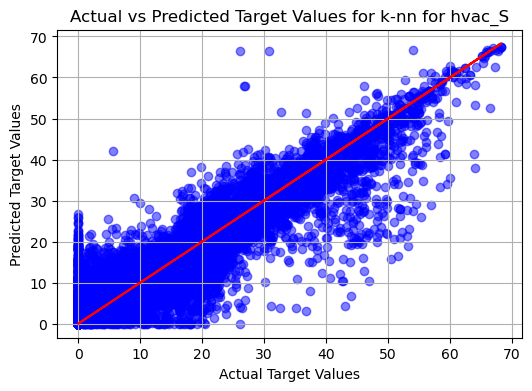

In [42]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y1_test, y1_pred_dis, color='blue', alpha=0.5)
plt.plot(y1_test, y1_test, color='red')
plt.title('Actual vs Predicted Target Values for k-nn for hvac_S')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.grid(True)
plt.show()

In [46]:
# Saving the k-NN model through pickle file

import pickle

Pkl_kNN_hvac_S = "Pickle_kNN_hvac_S_Model.pkl"  

with open(Pkl_kNN_hvac_S, 'wb') as file:  
    pickle.dump(knn_mahalanobis, file)
 

## k-NN Algorithm - Correlation Statistics for target variable hvac_N

In [29]:
# Load the CSV file
#df_N = pd.read_csv("feature_select_df_hvacN_1.csv")

# Perform 90:10 train-test split
#train_90_N, test_10_N = train_test_split(df_N, test_size=0.1, random_state=42)

# Save the 90% split files
#train_90_N.to_csv("train_90_N.csv", index=False)
#test_10_N.to_csv("test_10_N.csv", index=False)

In [30]:
df_features_90_N = pd.read_csv("train_90_N.csv")

In [31]:
#Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(df_features_90_N, target_90['hvac_N'], random_state=42, test_size=0.3)

In [32]:
# Scaling the features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X2_train_scaled, y2_train)

# Predicting on the testing set
y2_pred = knn.predict(X2_test_scaled)

# Evaluating model performance the model
mse_hvacN = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error:", mse_hvacN)


Mean Squared Error: 23.43564496598298


In [33]:
print('k-NN R2 score for hvacN: {}'.format(r2_score(y2_test,y2_pred)))
print('k-NN Mean Absolute Error (MAE) for hvacN: {}'.format(mean_absolute_error(y2_test, y2_pred)))
print('k-NN Mean Squared Error (MSE) for hvacN: {}'.format(mean_squared_error(y2_test, y2_pred)))
rmse_hvacN = np.sqrt(mean_squared_error(y2_test, y2_pred))
print('k-NN Root Mean Squared Error (RMSE) for hvacN: {}'.format(rmse_hvacN))


k-NN R2 score for hvacN: 0.8749333032065396
k-NN Mean Absolute Error (MAE) for hvacN: 2.6985699008857518
k-NN Mean Squared Error (MSE) for hvacN: 23.43564496598298
k-NN Root Mean Squared Error (RMSE) for hvacN: 4.8410375918787265


## Hyperparameter tuning in k-NN through cross-validation and gridsearch

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

knn_cv_n = KNeighborsRegressor(n_neighbors=3)

# Training model with cross-validation of 5 folds
cv_scores_n = cross_val_score(knn_cv_n, X2_train_scaled, y2_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2_n = cross_val_score(knn_cv_n, X2_train_scaled, y2_train, cv=5, scoring='r2')

print("CV Scores (RMSE):", np.sqrt(-cv_scores_n))
print("Mean CV Score (RMSE):", np.mean(np.sqrt(-cv_scores_n)))

print("CV Scores (R squared):", cv_scores_r2_n)
print("Mean CV Score (R squared):", np.mean(cv_scores_r2_n))

# Creating a dictionary of values we want to test for n_neighbors
param_grid_n = {'n_neighbors': np.arange(1, 25, 2)}

# Using GridSearch
knn_gscv_n = GridSearchCV(KNeighborsRegressor(), param_grid_n, cv=5, scoring='neg_mean_squared_error')

knn_gscv_n.fit(X2_train_scaled, y2_train)

print("Best n_neighbors value:", knn_gscv_n.best_params_)

print("Best CV Score (RMSE):", np.sqrt(-knn_gscv_n.best_score_))

# Evaluating model performance on test set
y_pred_tuned = knn_gscv_n.predict(X2_test_scaled)
rmse = np.sqrt(mean_squared_error(y2_test, y_pred_tuned))
r_squared = r2_score(y2_test, y_pred_tuned)
print("Test Set RMSE:", rmse)
print("Test Set R squared:", r_squared)

CV Scores (RMSE): [5.0082472  4.90665337 5.0367324  5.17095444 5.16853483]
Mean CV Score (RMSE): 5.058224446998724
CV Scores (R squared): [0.86929166 0.86991346 0.87166254 0.85869447 0.86132217]
Mean CV Score (R squared): 0.8661768595282566
Best n_neighbors value: {'n_neighbors': 5}
Best CV Score (RMSE): 5.041717714193332
Test Set RMSE: 4.8410375918787265
Test Set R squared: 0.8749333032065396


#### From Hyperparameter tuning results, we can see that k-NN model performs best at k=5

#### Implementing k-NN with other distance metrics such as manhattan and minkowski

In [35]:
knn_manhattan_n = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

knn_manhattan_n.fit(X2_train_scaled, y2_train)

# Predict on the testing set with Manhattan distance
y2_pred_manhattan = knn_manhattan_n.predict(X2_test_scaled)

mse_hvacN_manhattan = mean_squared_error(y2_test, y2_pred_manhattan)
print("\nManhattan Distance:")
print("Mean Squared Error:", mse_hvacN_manhattan)
print('k-NN R2 score for hvacN: {}'.format(r2_score(y2_test, y2_pred_manhattan)))
print('k-NN Mean Absolute Error (MAE) for hvacN: {}'.format(mean_absolute_error(y2_test, y2_pred_manhattan)))
print('k-NN Mean Squared Error (MSE) for hvacN: {}'.format(mse_hvacN_manhattan))
rmse_hvacN_manhattan = np.sqrt(mse_hvacN_manhattan)
print('k-NN Root Mean Squared Error (RMSE) for hvacN: {}'.format(rmse_hvacN_manhattan))


Manhattan Distance:
Mean Squared Error: 21.195831600423308
k-NN R2 score for hvacN: 0.8868862944500491
k-NN Mean Absolute Error (MAE) for hvacN: 2.5691088623998137
k-NN Mean Squared Error (MSE) for hvacN: 21.195831600423308
k-NN Root Mean Squared Error (RMSE) for hvacN: 4.603893091767369


In [36]:
knn_minkowski_n = KNeighborsRegressor(n_neighbors=5, metric='minkowski')

knn_minkowski_n.fit(X2_train_scaled, y2_train)

# Predict on the testing set with Minkowski distance
y2_pred_minkowski = knn_minkowski_n.predict(X2_test_scaled)

mse_hvacN_minkowski = mean_squared_error(y2_test, y2_pred_minkowski)
print("\nMinkowski Distance (p=2, equivalent to Euclidean):")
print("Mean Squared Error:", mse_hvacN_minkowski)
print('k-NN R2 score for hvacN: {}'.format(r2_score(y2_test, y2_pred_minkowski)))
print('k-NN Mean Absolute Error (MAE) for hvacN: {}'.format(mean_absolute_error(y2_test, y2_pred_minkowski)))
print('k-NN Mean Squared Error (MSE) for hvacN: {}'.format(mse_hvacN_minkowski))
rmse_hvacN_minkowski = np.sqrt(mse_hvacN_minkowski)
print('k-NN Root Mean Squared Error (RMSE) for hvacN: {}'.format(rmse_hvacN_minkowski))


Minkowski Distance (p=2, equivalent to Euclidean):
Mean Squared Error: 23.43564496598298
k-NN R2 score for hvacN: 0.8749333032065396
k-NN Mean Absolute Error (MAE) for hvacN: 2.6985699008857518
k-NN Mean Squared Error (MSE) for hvacN: 23.43564496598298
k-NN Root Mean Squared Error (RMSE) for hvacN: 4.8410375918787265


In [37]:
import numpy as np

# Scale the features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Calculate the inverse covariance matrix
VI_n = np.linalg.inv(np.cov(X2_train_scaled, rowvar=False))

# Chebyshev distance
knn_chebyshev_n = KNeighborsRegressor(n_neighbors=5, metric='chebyshev')

# Mahalanobis distance
knn_mahalanobis_n = KNeighborsRegressor(n_neighbors=5, metric='mahalanobis', metric_params={'VI': VI_n})

models_n = {
    "Chebyshev": knn_chebyshev_n,
    "Mahalanobis": knn_mahalanobis_n
}

for name, model in models_n.items():
    print(name)
    model.fit(X2_train_scaled, y2_train)
    y2_pred_dis = model.predict(X2_test_scaled)

    # Evaluate the model
    mse_hvacN = mean_squared_error(y2_test, y2_pred_dis)
    print("Mean Squared Error:", mse_hvacN)
    print('k-NN R2 score for hvacN:', r2_score(y2_test, y2_pred_dis))
    print('k-NN Mean Absolute Error (MAE) for hvacN:', mean_absolute_error(y2_test, y2_pred_dis))
    print('k-NN Root Mean Squared Error (RMSE) for hvacN:', np.sqrt(mse_hvacN))
    print()


Chebyshev
Mean Squared Error: 28.001720527197847
k-NN R2 score for hvacN: 0.8505659777679013
k-NN Mean Absolute Error (MAE) for hvacN: 2.988847265791097
k-NN Root Mean Squared Error (RMSE) for hvacN: 5.2916651941707205

Mahalanobis
Mean Squared Error: 20.094745657481138
k-NN R2 score for hvacN: 0.8927623512843873
k-NN Mean Absolute Error (MAE) for hvacN: 2.4743898992965874
k-NN Root Mean Squared Error (RMSE) for hvacN: 4.482716325787428



In [38]:
# Saving the model through pickle file

import pickle

Pkl_kNN_hvac_N = "Pickle_kNN_hvac_N_Model.pkl"  

with open(Pkl_kNN_hvac_N, 'wb') as file:  
    pickle.dump(knn_mahalanobis_n, file)
    
with open(Pkl_kNN_hvac_N, 'rb') as file:  
    Pickled_kNN_hvac_N_Model = pickle.load(file)

Pickled_kNN_hvac_N_Model

# Predict the Labels using the reloaded Model
Ypredict_hvac_N = Pickled_kNN_hvac_N_Model.predict(X2_test_scaled)  

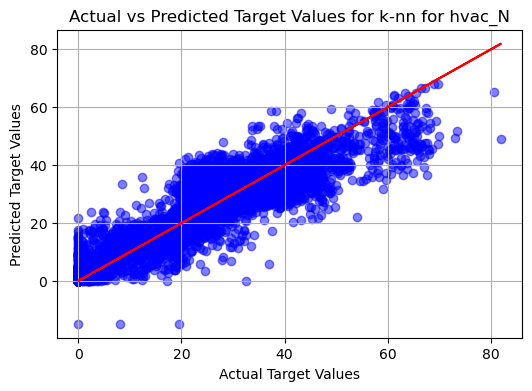

In [43]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y2_test, y2_pred_dis, color='blue', alpha=0.5)
plt.plot(y2_test, y2_test, color='red')  # Add a diagonal line for reference (actual = predicted)
plt.title('Actual vs Predicted Target Values for k-nn for hvac_N')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.grid(True)
plt.show()


# Building Models

#### Support Vector Regression SVR

In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the filtered data for hvac_N
filtered_data_n = pd.read_csv('train_90_N.csv')
hvac_targ = pd.read_csv('target_train_90.csv')

# Define features (X) and target variable (y) for hvac_N
X_n = filtered_data_n
y_n = hvac_targ['hvac_N']

# Split the data into training and testing sets for hvac_N
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_N
scaler_n = MinMaxScaler()

# Fit and transform the features for hvac_N
X_train_scaled_n = scaler_n.fit_transform(X_train_n)
X_test_scaled_n = scaler_n.transform(X_test_n)

# Initialize the SVR model for hvac_N
svr_model_n = SVR()

# Train the SVR model for hvac_N
svr_model_n.fit(X_train_scaled_n, y_train_n)

# Make predictions for hvac_N
y_pred_n = svr_model_n.predict(X_test_scaled_n)

# Evaluate the model performance for hvac_N
mae_n = mean_absolute_error(y_test_n, y_pred_n)
rmse_n = mean_squared_error(y_test_n, y_pred_n, squared=False)
r2_n = r2_score(y_test_n, y_pred_n)

# Print evaluation metrics for hvac_N
print("Mean Absolute Error (MAE) for hvac_N:", mae_n)
print("Root Mean Squared Error (RMSE) for hvac_N:", rmse_n)
print("R-squared (R2) score for hvac_N:", r2_n)

Mean Absolute Error (MAE) for hvac_N: 5.898647736390772
Root Mean Squared Error (RMSE) for hvac_N: 9.00754796071782
R-squared (R2) score for hvac_N: 0.57796242206795


In [27]:
# Load the filtered data for hvac_S
filtered_data_s = pd.read_csv('filtered_south.csv')


# Define features (X) and target variable (y) for hvac_S
X_s = filtered_data_s
y_s = hvac_targ['hvac_S']

# Split the data into training and testing sets for hvac_S
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_S
scaler_s = MinMaxScaler()

# Fit and transform the features for hvac_S
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

# Initialize the SVR model for hvac_S
svr_model_s = SVR()

# Train the SVR model for hvac_S
svr_model_s.fit(X_train_scaled_s, y_train_s)

# Make predictions for hvac_S
y_pred_s = svr_model_s.predict(X_test_scaled_s)

# Evaluate the model performance for hvac_S
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = mean_squared_error(y_test_s, y_pred_s, squared=False)
r2_s = r2_score(y_test_s, y_pred_s)

# Print evaluation metrics for hvac_S
print("Mean Absolute Error (MAE) for hvac_S:", mae_s)
print("Root Mean Squared Error (RMSE) for hvac_S:", rmse_s)
print("R-squared (R2) score for hvac_S:", r2_s)

Mean Absolute Error (MAE) for hvac_S: 5.348905424613711
Root Mean Squared Error (RMSE) for hvac_S: 7.740148520601543
R-squared (R2) score for hvac_S: 0.6497686740268154


# Random forest for hvac_N

In [21]:
#hvac_N

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the filtered data for north
filtered_data_north = pd.read_csv('train_90_N.csv')
hvac_tar = pd.read_csv('target_train_90.csv')

# Define features (X) and target variable (y)
X = filtered_data_north
y = hvac_tar['hvac_N']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE) for hvac_N:", mae)
print("Root Mean Squared Error (RMSE) for hvac_N:", rmse)
print("R-squared (R2) score for hvac_N:", r2)


Mean Absolute Error (MAE) for hvac_N: 1.6581052100068665
Root Mean Squared Error (RMSE) for hvac_N: 3.054805872279215
R-squared (R2) score for hvac_N: 0.9497832023160002


In [5]:
# After Standardization and adding more evaluation metrics

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Function to calculate MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2 / y_true).mean()

# Load the filtered data for hvac_N
filtered_data_n = pd.read_csv('train_90_N.csv')
hvac_tar = pd.read_csv('target_train_90.csv')

# Separate features (X) and target variable (y) for hvac_N
X_n = filtered_data_n
y_n = hvac_tar['hvac_N']

# Split the data into training and testing sets for hvac_N
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_N
scaler_n = MinMaxScaler()

# Fit and transform the features for hvac_N
X_train_scaled_n = scaler_n.fit_transform(X_train_n)
X_test_scaled_n = scaler_n.transform(X_test_n)

# Initialize the Random Forest model for hvac_N
rf_model_n = RandomForestRegressor(random_state=42)
rf_model_n.fit(X_train_scaled_n, y_train_n)
y_pred_n = rf_model_n.predict(X_test_scaled_n)

# Evaluate the model performance for hvac_N
mse_n = mean_squared_error(y_test_n, y_pred_n)
mae_n = mean_absolute_error(y_test_n, y_pred_n)
rmse_n = mean_squared_error(y_test_n, y_pred_n, squared=False)
r2_n = r2_score(y_test_n, y_pred_n)
msle_n = mean_squared_log_error(y_test_n, y_pred_n)
medae_n = median_absolute_error(y_test_n, y_pred_n)
mape_n = mean_absolute_percentage_error(y_test_n, y_pred_n)
mspe_n = mean_squared_percentage_error(y_test_n, y_pred_n)
evs_n = explained_variance_score(y_test_n, y_pred_n)

# Calculate F-statistic using statsmodels
X_train_n_sm = sm.add_constant(X_train_n)
model_n = sm.OLS(y_train_n, X_train_n_sm)
result_n = model_n.fit()
f_statistic_n = result_n.fvalue

print("Metrics for hvac_n:")
print("Mean Squared Error (MSE):", mse_n)
print("Mean Absolute Error (MAE):", mae_n)
print("Root Mean Squared Error (RMSE):", rmse_n)
print("R-squared (R2) Score:", r2_n)
print("Mean Squared Logarithmic Error (MSLE):", msle_n)
print("Median Absolute Error (MedAE):", medae_n)
print("Mean Absolute Percentage Error (MAPE):", mape_n)
print("Explained Variance Score (EVS):", evs_n)
print("F-statistic:", f_statistic_n)

Metrics for hvac_n:
Mean Squared Error (MSE): 9.297880521963487
Mean Absolute Error (MAE): 1.6560348617203338
Root Mean Squared Error (RMSE): 3.0492426144804363
R-squared (R2) Score: 0.9499659403469477
Mean Squared Logarithmic Error (MSLE): 0.0866338406161647
Median Absolute Error (MedAE): 0.5767797673997421
Mean Absolute Percentage Error (MAPE): 404105901081336.75
Mean Squared Percentage Error (MSPE): inf
Explained Variance Score (EVS): 0.9499709140291251
F-statistic: 1585.4865899884355


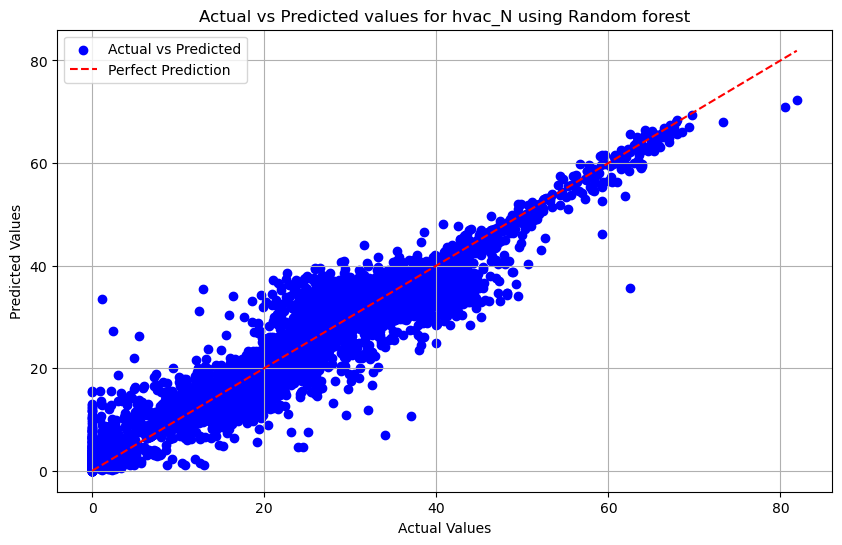

In [10]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, y_pred_n, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_n), max(y_test_n)], [min(y_test_n), max(y_test_n)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted values for hvac_N using Random forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import pickle

# Save the trained model to a file
with open('rf_model_n.pkl', 'wb') as f:
    pickle.dump(rf_model_n, f)


In [9]:
# Load the saved model from the file
with open('rf_model_n.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_scaled_n)


# hvac_S

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the filtered data from CSV
filtered_data_south = pd.read_csv('train_90_S.csv')

# Separate features (X) and target variable (y)
X = filtered_data_south
y = hvac_tar['hvac_S']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 14.173031671084196
Mean Absolute Error (MAE): 2.419547830577498
R-squared (R2) Score: 0.9150789960847577


In [12]:
# After Standardization and adding more evaluation metrics

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Function to calculate MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2 / y_true).mean()

# Load the filtered data for hvac_S
filtered_data_s = pd.read_csv('train_90_S.csv')
hvac_tar = pd.read_csv('target_train_90.csv')

# Separate features (X) and target variable (y) for hvac_S
X_s = filtered_data_s
y_s = hvac_tar['hvac_S']

# Split the data into training and testing sets for hvac_S
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_S
scaler_s = MinMaxScaler()

# Fit and transform the features for hvac_S
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

# Initialize the Random Forest model for hvac_S
rf_model_s = RandomForestRegressor(random_state=42)
rf_model_s.fit(X_train_scaled_s, y_train_s)
y_pred_s = rf_model_s.predict(X_test_scaled_s)

# Evaluate the model performance for hvac_S
mse_s = mean_squared_error(y_test_s, y_pred_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = mean_squared_error(y_test_s, y_pred_s, squared=False)
r2_s = r2_score(y_test_s, y_pred_s)
msle_s = mean_squared_log_error(y_test_s, y_pred_s)
medae_s = median_absolute_error(y_test_s, y_pred_s)
mape_s = mean_absolute_percentage_error(y_test_s, y_pred_s)
mspe_s = mean_squared_percentage_error(y_test_s, y_pred_s)
evs_s = explained_variance_score(y_test_s, y_pred_s)

# Calculate F-statistic using statsmodels
X_train_s_sm = sm.add_constant(X_train_s) 
model_s = sm.OLS(y_train_s, X_train_s_sm)
result_s = model_s.fit()
f_statistic_s = result_s.fvalue

print("Metrics for hvac_S:")
print("Mean Squared Error (MSE):", mse_s)
print("Mean Absolute Error (MAE):", mae_s)
print("Root Mean Squared Error (RMSE):", rmse_s)
print("R-squared (R2) Score:", r2_s)
print("Mean Squared Logarithmic Error (MSLE):", msle_s)
print("Median Absolute Error (MedAE):", medae_s)
print("Mean Absolute Percentage Error (MAPE):", mape_s)
print("Explained Variance Score (EVS):", evs_s)
print("F-statistic:", f_statistic_s)


Metrics for hvac_S:
Mean Squared Error (MSE): 14.210459883658949
Mean Absolute Error (MAE): 2.418785294187174
Root Mean Squared Error (RMSE): 3.7696763632517514
R-squared (R2) Score: 0.914854736274975
Mean Squared Logarithmic Error (MSLE): 0.33977623167090004
Median Absolute Error (MedAE): 1.3758090666899907
Mean Absolute Percentage Error (MAPE): 1872744713252521.8
Mean Squared Percentage Error (MSPE): inf
Explained Variance Score (EVS): 0.9148547847281745
F-statistic: 1484.6441474632759


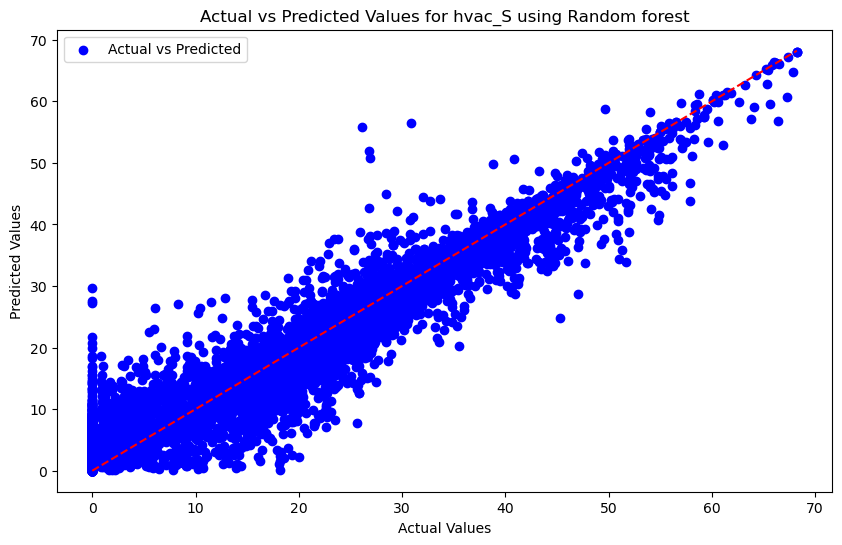

In [19]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_s, y_pred_s, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_s), max(y_test_s)], [min(y_test_s), max(y_test_s)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for hvac_S using Random forest')
plt.legend()
plt.show()


In [15]:
#Saving the file

In [16]:
import pickle

# Save the model to a file
with open('random_forest_hvac_S.pkl', 'wb') as file:
    pickle.dump(rf_model_s, file)


In [18]:
# Load the saved model from the file
with open('random_forest_hvac_S.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_scaled_s)


### ----------End of Random Forest Model ------------ #